##### CAPSTONE PROJECT

###### Problem statement: 
# Creation of Intelligent Regression based data model to predict house / home prices on basis of sales data in Seattle region from 2014 to 2015. Data models take into account various features like area, location, amenities and condition

A house value is simply more than location and square footage. Like the features that make 
up a person, an educated party would want to know all aspects that give a house its value. For 
example, you want to sell a house and you don’t know the price which you can take — it can’t 
be too low or too high. To find house price you usually try to find similar properties in your 
neighbourhood and based on gathered data you will try to assess your house price

In [2]:
%matplotlib inline
# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
# pre-processing method
from sklearn.model_selection import train_test_split

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#pyod models
from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from joblib import dump, load

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

###### Reading the data

In [3]:
caps_df = pd.read_csv('innercity.csv')

In [4]:
caps_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


###### Exploring the given dataset

In [5]:
caps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
caps_df.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [7]:
caps_df.shape

(21613, 23)

In [8]:
caps_df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [9]:
for value in ['cid','dayhours','price','room_bed','room_bath','living_measure','lot_measure','ceil','coast','sight','condition','quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','furnished','total_area']:
    print(value,":",sum(caps_df[value] == '?'))

cid : 0
dayhours : 0
price : 0
room_bed : 0
room_bath : 0
living_measure : 0
lot_measure : 0
ceil : 0
coast : 0
sight : 0
condition : 0
quality : 0
ceil_measure : 0
basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
living_measure15 : 0
lot_measure15 : 0
furnished : 0
total_area : 0


In [10]:
caps_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


###### Data Visualization

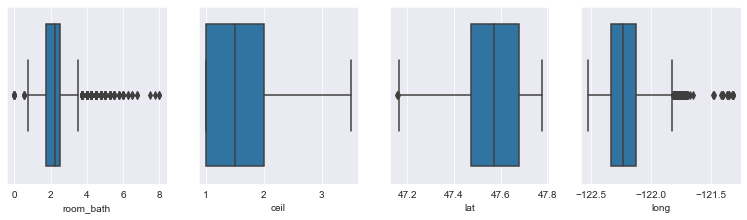

In [11]:
numeric_col = caps_df.columns[pd.Series(caps_df.columns).apply(lambda x : caps_df[x].dtype == 'float64')]  # Non object columns

plt.figure(figsize = (20,15))

j = 1
for i in numeric_col:
    plt.subplot(4,6,j)
    sns.boxplot(caps_df[i])
    j += 1

<AxesSubplot:xlabel='price'>

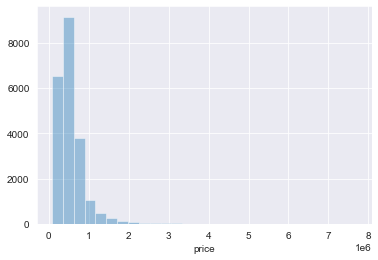

In [12]:
#pd.value_counts(caps_df["price"]).plot(kind="bar")
sns.distplot(caps_df['price'],kde=False, bins=28)

<AxesSubplot:xlabel='ceil', ylabel='room_bed'>

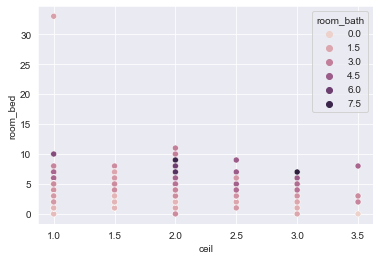

In [13]:
sns.scatterplot(caps_df['ceil'], caps_df['room_bed'],caps_df['room_bath'])

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

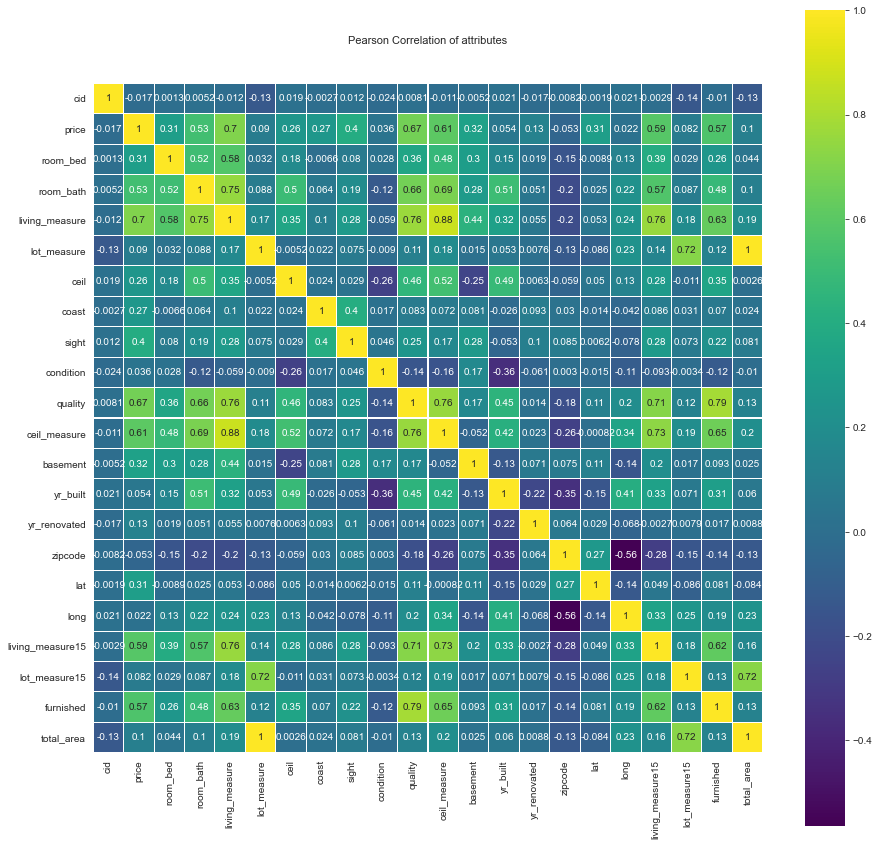

In [14]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=11)
sns.heatmap(caps_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
caps_df.groupby(["price"]).count()

,cid,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,,
75000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5570000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6890000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


###### cid column can be dropped as it is of no use in analysis 

In [16]:
caps_df = caps_df.drop(labels = "cid", axis =1)

In [17]:
caps_df.shape

(21613, 22)

In [18]:
caps_df.groupby(["price"]).mean()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,
75000,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0,0.0,44047.0
78000,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0,0.0,17124.0
80000,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0,0.0,5480.0
81000,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,1943.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0,0.0,10705.0
82000,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,1954.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0,0.0,11286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0,1.0,31985.0
5570000,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0,1.0,44269.0
6890000,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0,1.0,41264.0


#20features

###### Train and Test split the given data

In [20]:
# 'cid','dayhours','price','room_bed','room_bath','living_measure','lot_measure','ceil','coast','sight','condition','quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','furnished','total_area'
from scipy.stats import zscore
x=caps_df[["room_bed","room_bath","quality","living_measure","lot_measure","ceil_measure","yr_built","lat","living_measure15","lot_measure15","total_area","ceil","coast","sight","condition","basement","yr_renovated","zipcode","long","furnished"]]
y=caps_df["price"]
X  = x.apply(zscore)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

b1= regression_model.coef_
b0=regression_model.intercept_
print("b1 is: {} and b0 is : {}".format(b1, b0))

b1 is: [-31853.95778908  31089.24186309 100546.80558731  80020.03865951
   1431.19717497  73838.77085737 -74606.73898989  83323.59502383
  16123.2557788  -10503.68884858   3192.53494608   3921.03149145
  54352.83287671  38958.22541106  17985.04071909  27901.38383215
   9435.16673208 -31775.25393975 -31525.56099982  16015.76771812] and b0 is : 540607.0101867609


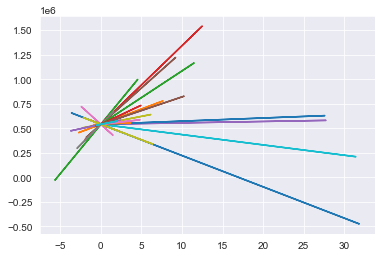

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

###### Model the given data

In [24]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data
    
    sse = np.sum(pred - y_test)#sum of squares estimator
    
    tss = np.sum(pred - np.mean(pred)**2) #total sum of squares
    
    r2 = 1 - sse / tss
    
    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    print("r2 :",r2)
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
#               
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation across 3 metrics
    
    r2_cv =  np.mean(r2 in cv['test_r2'])
    
       
    rmse_cv = np.mean([sqrt(rmse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, r2_cv, rmse_cv, duration, pred  # return all the metrics along with predictions


In [25]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=1,min_samples_split=50,min_samples_leaf=50)   
#Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

diab_model = GaussianNB()
diab_model.fit(X_train, y_train.ravel())
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
xgb = XGBRegressor()
cgb = CatBoostRegressor()
lgb = LGBMRegressor()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models


# putting all the models in a for loop and appending the results of each of the models to the 'result' dictionary

for model, name, in zip([lr, dt, br, rf,
                         gb, xgb, cgb, lgb], ['Linear Regression', 'Decision Tree','Bagging Ensemble', 'Random Forest',
                                              'Gradient Boost Ensemble', 'Xgboost', 'Catboost','LightGB']):

    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key


r2 : 0.7025854944445906
r2 : 0.7614464079759357
r2 : 0.8704602193466047
r2 : 0.8857447277099975
r2 : 0.8714090419017353
r2 : 0.8742027261162134
Learning rate set to 0.064823
0:	learn: 351467.4215139	total: 156ms	remaining: 2m 35s
1:	learn: 337217.4067714	total: 163ms	remaining: 1m 21s
2:	learn: 324975.3911291	total: 169ms	remaining: 56.3s
3:	learn: 313013.3409387	total: 175ms	remaining: 43.7s
4:	learn: 301537.5241045	total: 181ms	remaining: 36.1s
5:	learn: 290882.1749409	total: 187ms	remaining: 31s
6:	learn: 281007.7996807	total: 193ms	remaining: 27.4s
7:	learn: 272027.0041749	total: 199ms	remaining: 24.7s
8:	learn: 263337.7431024	total: 205ms	remaining: 22.5s
9:	learn: 255209.1176071	total: 211ms	remaining: 20.9s
10:	learn: 247877.4027453	total: 218ms	remaining: 19.6s
11:	learn: 240873.0115307	total: 224ms	remaining: 18.5s
12:	learn: 234269.3765954	total: 230ms	remaining: 17.5s
13:	learn: 227497.0106486	total: 236ms	remaining: 16.6s
14:	learn: 222624.6249742	total: 242ms	remaining: 15

157:	learn: 106784.1285011	total: 1.06s	remaining: 5.66s
158:	learn: 106620.9224890	total: 1.07s	remaining: 5.65s
159:	learn: 106529.4161914	total: 1.07s	remaining: 5.64s
160:	learn: 106426.0555052	total: 1.08s	remaining: 5.63s
161:	learn: 106254.0646752	total: 1.09s	remaining: 5.62s
162:	learn: 106153.7180723	total: 1.09s	remaining: 5.61s
163:	learn: 105988.1306821	total: 1.1s	remaining: 5.6s
164:	learn: 105761.3394171	total: 1.1s	remaining: 5.59s
165:	learn: 105624.1111367	total: 1.11s	remaining: 5.58s
166:	learn: 105482.0029992	total: 1.11s	remaining: 5.57s
167:	learn: 105422.4160124	total: 1.12s	remaining: 5.55s
168:	learn: 105356.9617643	total: 1.13s	remaining: 5.54s
169:	learn: 105214.1362653	total: 1.13s	remaining: 5.53s
170:	learn: 105211.0217107	total: 1.14s	remaining: 5.51s
171:	learn: 105081.8434295	total: 1.14s	remaining: 5.49s
172:	learn: 104882.0669598	total: 1.15s	remaining: 5.48s
173:	learn: 104713.1202063	total: 1.15s	remaining: 5.47s
174:	learn: 104601.3967298	total: 

316:	learn: 92160.6401994	total: 1.95s	remaining: 4.2s
317:	learn: 92101.2490697	total: 1.96s	remaining: 4.2s
318:	learn: 92026.7595173	total: 1.96s	remaining: 4.19s
319:	learn: 91945.6816963	total: 1.97s	remaining: 4.18s
320:	learn: 91861.5038236	total: 1.98s	remaining: 4.18s
321:	learn: 91791.3695252	total: 1.98s	remaining: 4.17s
322:	learn: 91735.0930433	total: 1.99s	remaining: 4.16s
323:	learn: 91663.1432301	total: 1.99s	remaining: 4.16s
324:	learn: 91620.6953980	total: 2s	remaining: 4.15s
325:	learn: 91570.2650551	total: 2s	remaining: 4.14s
326:	learn: 91510.8140918	total: 2.01s	remaining: 4.14s
327:	learn: 91462.0483890	total: 2.02s	remaining: 4.13s
328:	learn: 91381.2826141	total: 2.02s	remaining: 4.12s
329:	learn: 91287.9835789	total: 2.03s	remaining: 4.11s
330:	learn: 91227.5559696	total: 2.03s	remaining: 4.11s
331:	learn: 91165.0703701	total: 2.04s	remaining: 4.1s
332:	learn: 91130.4511843	total: 2.04s	remaining: 4.09s
333:	learn: 91053.8739752	total: 2.05s	remaining: 4.08s
3

474:	learn: 83335.2663230	total: 2.84s	remaining: 3.14s
475:	learn: 83265.0158525	total: 2.85s	remaining: 3.14s
476:	learn: 83229.8975907	total: 2.86s	remaining: 3.13s
477:	learn: 83186.2654318	total: 2.86s	remaining: 3.13s
478:	learn: 83156.3895727	total: 2.87s	remaining: 3.12s
479:	learn: 83083.3221646	total: 2.87s	remaining: 3.11s
480:	learn: 83039.2996096	total: 2.88s	remaining: 3.11s
481:	learn: 83008.6263984	total: 2.89s	remaining: 3.1s
482:	learn: 82942.5901982	total: 2.89s	remaining: 3.1s
483:	learn: 82876.6184338	total: 2.9s	remaining: 3.09s
484:	learn: 82849.2073476	total: 2.9s	remaining: 3.08s
485:	learn: 82823.5339071	total: 2.91s	remaining: 3.08s
486:	learn: 82781.6632838	total: 2.91s	remaining: 3.07s
487:	learn: 82740.8174335	total: 2.92s	remaining: 3.06s
488:	learn: 82719.9401123	total: 2.92s	remaining: 3.06s
489:	learn: 82667.9513363	total: 2.93s	remaining: 3.05s
490:	learn: 82644.7278380	total: 2.94s	remaining: 3.04s
491:	learn: 82611.7200157	total: 2.94s	remaining: 3.

633:	learn: 77492.4715547	total: 3.74s	remaining: 2.16s
634:	learn: 77471.5699359	total: 3.74s	remaining: 2.15s
635:	learn: 77444.7837565	total: 3.75s	remaining: 2.15s
636:	learn: 77423.6664581	total: 3.75s	remaining: 2.14s
637:	learn: 77386.3947599	total: 3.76s	remaining: 2.13s
638:	learn: 77367.1078406	total: 3.77s	remaining: 2.13s
639:	learn: 77343.3737533	total: 3.77s	remaining: 2.12s
640:	learn: 77301.8521982	total: 3.78s	remaining: 2.12s
641:	learn: 77255.9356534	total: 3.78s	remaining: 2.11s
642:	learn: 77217.7308403	total: 3.79s	remaining: 2.1s
643:	learn: 77172.9991113	total: 3.79s	remaining: 2.1s
644:	learn: 77129.0215012	total: 3.8s	remaining: 2.09s
645:	learn: 77111.0390810	total: 3.81s	remaining: 2.08s
646:	learn: 77078.6825255	total: 3.81s	remaining: 2.08s
647:	learn: 77059.1433146	total: 3.82s	remaining: 2.07s
648:	learn: 77024.8840094	total: 3.82s	remaining: 2.07s
649:	learn: 76996.2712689	total: 3.83s	remaining: 2.06s
650:	learn: 76951.3081160	total: 3.83s	remaining: 2

792:	learn: 73207.7554970	total: 4.63s	remaining: 1.21s
793:	learn: 73189.3917399	total: 4.63s	remaining: 1.2s
794:	learn: 73166.6003196	total: 4.64s	remaining: 1.2s
795:	learn: 73131.9497314	total: 4.65s	remaining: 1.19s
796:	learn: 73113.4555170	total: 4.65s	remaining: 1.19s
797:	learn: 73090.8095320	total: 4.66s	remaining: 1.18s
798:	learn: 73054.2198976	total: 4.67s	remaining: 1.17s
799:	learn: 73034.8623654	total: 4.67s	remaining: 1.17s
800:	learn: 73007.9529136	total: 4.68s	remaining: 1.16s
801:	learn: 72983.1568910	total: 4.68s	remaining: 1.16s
802:	learn: 72952.4419283	total: 4.69s	remaining: 1.15s
803:	learn: 72927.2745584	total: 4.69s	remaining: 1.14s
804:	learn: 72902.1112054	total: 4.7s	remaining: 1.14s
805:	learn: 72885.9052636	total: 4.7s	remaining: 1.13s
806:	learn: 72874.3027906	total: 4.71s	remaining: 1.13s
807:	learn: 72830.2714077	total: 4.71s	remaining: 1.12s
808:	learn: 72810.0877044	total: 4.72s	remaining: 1.11s
809:	learn: 72773.3161750	total: 4.73s	remaining: 1.

951:	learn: 69652.6559474	total: 5.52s	remaining: 278ms
952:	learn: 69638.8297924	total: 5.53s	remaining: 273ms
953:	learn: 69616.0643193	total: 5.54s	remaining: 267ms
954:	learn: 69604.9004509	total: 5.54s	remaining: 261ms
955:	learn: 69586.1208708	total: 5.55s	remaining: 255ms
956:	learn: 69575.1360060	total: 5.55s	remaining: 250ms
957:	learn: 69552.9629350	total: 5.56s	remaining: 244ms
958:	learn: 69535.2328033	total: 5.57s	remaining: 238ms
959:	learn: 69523.9213908	total: 5.57s	remaining: 232ms
960:	learn: 69495.3047216	total: 5.58s	remaining: 226ms
961:	learn: 69481.2024803	total: 5.58s	remaining: 221ms
962:	learn: 69458.2871551	total: 5.59s	remaining: 215ms
963:	learn: 69439.6433544	total: 5.59s	remaining: 209ms
964:	learn: 69411.5760112	total: 5.6s	remaining: 203ms
965:	learn: 69383.6616727	total: 5.61s	remaining: 197ms
966:	learn: 69383.2528723	total: 5.61s	remaining: 191ms
967:	learn: 69372.7459913	total: 5.62s	remaining: 186ms
968:	learn: 69352.5258862	total: 5.62s	remaining:

101:	learn: 116610.5503647	total: 544ms	remaining: 4.79s
102:	learn: 116469.8742806	total: 550ms	remaining: 4.79s
103:	learn: 116022.3802392	total: 556ms	remaining: 4.79s
104:	learn: 115812.0816943	total: 562ms	remaining: 4.79s
105:	learn: 115627.4046500	total: 568ms	remaining: 4.79s
106:	learn: 115420.6769606	total: 574ms	remaining: 4.79s
107:	learn: 115232.3392031	total: 581ms	remaining: 4.8s
108:	learn: 114734.6885671	total: 587ms	remaining: 4.8s
109:	learn: 114465.1950791	total: 593ms	remaining: 4.8s
110:	learn: 114254.6896042	total: 599ms	remaining: 4.8s
111:	learn: 114087.3403606	total: 605ms	remaining: 4.79s
112:	learn: 113800.8966565	total: 611ms	remaining: 4.79s
113:	learn: 113650.7564052	total: 616ms	remaining: 4.79s
114:	learn: 113455.9843234	total: 622ms	remaining: 4.79s
115:	learn: 113300.1853486	total: 628ms	remaining: 4.78s
116:	learn: 113209.5628854	total: 633ms	remaining: 4.78s
117:	learn: 112872.0212038	total: 639ms	remaining: 4.77s
118:	learn: 112705.0806413	total: 6

268:	learn: 95031.4682939	total: 1.44s	remaining: 3.91s
269:	learn: 94909.6623024	total: 1.44s	remaining: 3.9s
270:	learn: 94788.2688481	total: 1.45s	remaining: 3.9s
271:	learn: 94695.3306489	total: 1.45s	remaining: 3.89s
272:	learn: 94637.2225254	total: 1.46s	remaining: 3.89s
273:	learn: 94575.0731558	total: 1.47s	remaining: 3.88s
274:	learn: 94464.4371445	total: 1.47s	remaining: 3.88s
275:	learn: 94385.4236600	total: 1.48s	remaining: 3.88s
276:	learn: 94270.1737990	total: 1.48s	remaining: 3.87s
277:	learn: 94185.0286828	total: 1.49s	remaining: 3.87s
278:	learn: 94128.9102378	total: 1.49s	remaining: 3.86s
279:	learn: 94066.2260694	total: 1.5s	remaining: 3.85s
280:	learn: 94007.5108235	total: 1.5s	remaining: 3.85s
281:	learn: 93922.4512594	total: 1.51s	remaining: 3.85s
282:	learn: 93859.5998636	total: 1.51s	remaining: 3.84s
283:	learn: 93743.9239901	total: 1.52s	remaining: 3.83s
284:	learn: 93699.7903379	total: 1.52s	remaining: 3.83s
285:	learn: 93581.7287492	total: 1.53s	remaining: 3.

436:	learn: 84766.3034424	total: 2.32s	remaining: 3s
437:	learn: 84737.0902147	total: 2.33s	remaining: 2.99s
438:	learn: 84701.2303846	total: 2.34s	remaining: 2.98s
439:	learn: 84647.4091070	total: 2.34s	remaining: 2.98s
440:	learn: 84578.0956944	total: 2.35s	remaining: 2.97s
441:	learn: 84521.9977129	total: 2.35s	remaining: 2.97s
442:	learn: 84462.7073203	total: 2.36s	remaining: 2.96s
443:	learn: 84431.9870175	total: 2.36s	remaining: 2.96s
444:	learn: 84401.9962986	total: 2.37s	remaining: 2.96s
445:	learn: 84364.4353425	total: 2.37s	remaining: 2.95s
446:	learn: 84304.6459100	total: 2.38s	remaining: 2.94s
447:	learn: 84267.9925074	total: 2.38s	remaining: 2.94s
448:	learn: 84218.8819664	total: 2.39s	remaining: 2.93s
449:	learn: 84155.6533526	total: 2.4s	remaining: 2.93s
450:	learn: 84128.6385466	total: 2.4s	remaining: 2.92s
451:	learn: 84086.1454430	total: 2.4s	remaining: 2.92s
452:	learn: 84044.1036629	total: 2.41s	remaining: 2.91s
453:	learn: 83987.5923718	total: 2.42s	remaining: 2.9s

605:	learn: 77954.6353589	total: 3.22s	remaining: 2.09s
606:	learn: 77938.2138256	total: 3.22s	remaining: 2.09s
607:	learn: 77919.1269088	total: 3.23s	remaining: 2.08s
608:	learn: 77880.4161354	total: 3.23s	remaining: 2.08s
609:	learn: 77847.1121672	total: 3.24s	remaining: 2.07s
610:	learn: 77813.0139046	total: 3.25s	remaining: 2.07s
611:	learn: 77761.4157913	total: 3.25s	remaining: 2.06s
612:	learn: 77696.6887180	total: 3.26s	remaining: 2.06s
613:	learn: 77660.1265229	total: 3.26s	remaining: 2.05s
614:	learn: 77630.6325525	total: 3.27s	remaining: 2.04s
615:	learn: 77607.1322208	total: 3.27s	remaining: 2.04s
616:	learn: 77584.1322828	total: 3.29s	remaining: 2.04s
617:	learn: 77560.8407739	total: 3.29s	remaining: 2.04s
618:	learn: 77539.7478647	total: 3.3s	remaining: 2.03s
619:	learn: 77507.0619379	total: 3.3s	remaining: 2.02s
620:	learn: 77483.6020660	total: 3.31s	remaining: 2.02s
621:	learn: 77443.5552683	total: 3.31s	remaining: 2.01s
622:	learn: 77412.2631007	total: 3.32s	remaining: 

771:	learn: 73073.1109865	total: 4.11s	remaining: 1.21s
772:	learn: 73054.9151486	total: 4.11s	remaining: 1.21s
773:	learn: 73024.0166139	total: 4.12s	remaining: 1.2s
774:	learn: 73001.8088364	total: 4.13s	remaining: 1.2s
775:	learn: 72962.2334231	total: 4.13s	remaining: 1.19s
776:	learn: 72943.0940829	total: 4.14s	remaining: 1.19s
777:	learn: 72921.3916530	total: 4.14s	remaining: 1.18s
778:	learn: 72891.1776817	total: 4.15s	remaining: 1.18s
779:	learn: 72852.7995333	total: 4.15s	remaining: 1.17s
780:	learn: 72829.1002982	total: 4.16s	remaining: 1.17s
781:	learn: 72803.8332629	total: 4.16s	remaining: 1.16s
782:	learn: 72778.0819797	total: 4.17s	remaining: 1.16s
783:	learn: 72748.3079338	total: 4.17s	remaining: 1.15s
784:	learn: 72726.0223820	total: 4.18s	remaining: 1.14s
785:	learn: 72704.1112163	total: 4.18s	remaining: 1.14s
786:	learn: 72683.3130187	total: 4.19s	remaining: 1.13s
787:	learn: 72666.1290093	total: 4.2s	remaining: 1.13s
788:	learn: 72651.0153743	total: 4.2s	remaining: 1.

937:	learn: 69386.5983771	total: 5s	remaining: 330ms
938:	learn: 69372.1528088	total: 5s	remaining: 325ms
939:	learn: 69356.1222671	total: 5.01s	remaining: 320ms
940:	learn: 69332.4345393	total: 5.01s	remaining: 314ms
941:	learn: 69315.4609559	total: 5.02s	remaining: 309ms
942:	learn: 69290.6390887	total: 5.03s	remaining: 304ms
943:	learn: 69273.1107344	total: 5.03s	remaining: 298ms
944:	learn: 69249.7219840	total: 5.04s	remaining: 293ms
945:	learn: 69218.3983568	total: 5.04s	remaining: 288ms
946:	learn: 69192.1032606	total: 5.05s	remaining: 283ms
947:	learn: 69159.3123602	total: 5.05s	remaining: 277ms
948:	learn: 69132.2472678	total: 5.06s	remaining: 272ms
949:	learn: 69112.7837768	total: 5.06s	remaining: 267ms
950:	learn: 69107.0607681	total: 5.07s	remaining: 261ms
951:	learn: 69092.4631172	total: 5.07s	remaining: 256ms
952:	learn: 69065.6133642	total: 5.08s	remaining: 251ms
953:	learn: 69038.7043129	total: 5.08s	remaining: 245ms
954:	learn: 69023.7572510	total: 5.09s	remaining: 240m

98:	learn: 116045.9393844	total: 524ms	remaining: 4.76s
99:	learn: 115877.0162154	total: 529ms	remaining: 4.76s
100:	learn: 115662.4542474	total: 535ms	remaining: 4.76s
101:	learn: 115451.3831315	total: 540ms	remaining: 4.75s
102:	learn: 115237.6064700	total: 546ms	remaining: 4.75s
103:	learn: 115018.5109862	total: 551ms	remaining: 4.75s
104:	learn: 114835.3292494	total: 557ms	remaining: 4.75s
105:	learn: 114591.7662399	total: 563ms	remaining: 4.74s
106:	learn: 114348.8733725	total: 568ms	remaining: 4.74s
107:	learn: 114097.7666104	total: 573ms	remaining: 4.74s
108:	learn: 113806.6303071	total: 579ms	remaining: 4.73s
109:	learn: 113621.2633261	total: 584ms	remaining: 4.72s
110:	learn: 113454.0063164	total: 589ms	remaining: 4.72s
111:	learn: 113262.4097037	total: 594ms	remaining: 4.71s
112:	learn: 113129.4785840	total: 600ms	remaining: 4.71s
113:	learn: 113034.4987663	total: 605ms	remaining: 4.7s
114:	learn: 112659.5685192	total: 610ms	remaining: 4.7s
115:	learn: 112439.1620783	total: 6

266:	learn: 95319.3023380	total: 1.41s	remaining: 3.88s
267:	learn: 95204.7849050	total: 1.42s	remaining: 3.88s
268:	learn: 95125.8153803	total: 1.43s	remaining: 3.87s
269:	learn: 95051.5744564	total: 1.43s	remaining: 3.87s
270:	learn: 94939.9319230	total: 1.44s	remaining: 3.87s
271:	learn: 94859.0596560	total: 1.44s	remaining: 3.86s
272:	learn: 94750.1397220	total: 1.45s	remaining: 3.86s
273:	learn: 94649.3275231	total: 1.45s	remaining: 3.85s
274:	learn: 94607.1239792	total: 1.46s	remaining: 3.85s
275:	learn: 94570.3436504	total: 1.46s	remaining: 3.84s
276:	learn: 94398.9144649	total: 1.47s	remaining: 3.84s
277:	learn: 94313.3904036	total: 1.48s	remaining: 3.83s
278:	learn: 94240.5602948	total: 1.48s	remaining: 3.83s
279:	learn: 94188.4484281	total: 1.49s	remaining: 3.82s
280:	learn: 94109.8405531	total: 1.49s	remaining: 3.81s
281:	learn: 94044.4370323	total: 1.51s	remaining: 3.85s
282:	learn: 93964.1434439	total: 1.52s	remaining: 3.85s
283:	learn: 93878.9961974	total: 1.52s	remaining

430:	learn: 84989.3769469	total: 2.31s	remaining: 3.04s
431:	learn: 84964.6241796	total: 2.31s	remaining: 3.04s
432:	learn: 84921.7824774	total: 2.32s	remaining: 3.03s
433:	learn: 84876.6584253	total: 2.32s	remaining: 3.03s
434:	learn: 84833.7024880	total: 2.33s	remaining: 3.02s
435:	learn: 84767.5558789	total: 2.33s	remaining: 3.02s
436:	learn: 84722.7568125	total: 2.34s	remaining: 3.01s
437:	learn: 84674.5182665	total: 2.35s	remaining: 3.01s
438:	learn: 84641.0502241	total: 2.35s	remaining: 3s
439:	learn: 84596.4383524	total: 2.36s	remaining: 3s
440:	learn: 84552.9470913	total: 2.36s	remaining: 2.99s
441:	learn: 84523.2938972	total: 2.37s	remaining: 2.99s
442:	learn: 84473.4014242	total: 2.37s	remaining: 2.98s
443:	learn: 84418.9951851	total: 2.38s	remaining: 2.98s
444:	learn: 84390.2590458	total: 2.38s	remaining: 2.97s
445:	learn: 84338.2415371	total: 2.39s	remaining: 2.97s
446:	learn: 84267.9871142	total: 2.39s	remaining: 2.96s
447:	learn: 84223.4035854	total: 2.4s	remaining: 2.96s

596:	learn: 78010.2376763	total: 3.19s	remaining: 2.16s
597:	learn: 77971.8650323	total: 3.2s	remaining: 2.15s
598:	learn: 77961.6778338	total: 3.21s	remaining: 2.15s
599:	learn: 77914.3279554	total: 3.21s	remaining: 2.14s
600:	learn: 77892.9420721	total: 3.22s	remaining: 2.14s
601:	learn: 77845.8774333	total: 3.22s	remaining: 2.13s
602:	learn: 77795.6036752	total: 3.23s	remaining: 2.13s
603:	learn: 77768.9115769	total: 3.24s	remaining: 2.12s
604:	learn: 77720.7940616	total: 3.25s	remaining: 2.12s
605:	learn: 77704.6621556	total: 3.25s	remaining: 2.11s
606:	learn: 77666.1592777	total: 3.26s	remaining: 2.11s
607:	learn: 77636.0441229	total: 3.26s	remaining: 2.1s
608:	learn: 77601.1146031	total: 3.27s	remaining: 2.1s
609:	learn: 77578.3618396	total: 3.27s	remaining: 2.09s
610:	learn: 77542.9013566	total: 3.28s	remaining: 2.09s
611:	learn: 77506.5011422	total: 3.28s	remaining: 2.08s
612:	learn: 77464.1774099	total: 3.29s	remaining: 2.08s
613:	learn: 77436.6430162	total: 3.29s	remaining: 2

762:	learn: 73073.2528566	total: 4.09s	remaining: 1.27s
763:	learn: 73042.8059370	total: 4.09s	remaining: 1.26s
764:	learn: 73025.0236149	total: 4.1s	remaining: 1.26s
765:	learn: 73004.2989676	total: 4.11s	remaining: 1.25s
766:	learn: 72979.2359573	total: 4.11s	remaining: 1.25s
767:	learn: 72953.6167259	total: 4.12s	remaining: 1.24s
768:	learn: 72920.9235530	total: 4.12s	remaining: 1.24s
769:	learn: 72888.6198112	total: 4.13s	remaining: 1.23s
770:	learn: 72853.1652316	total: 4.13s	remaining: 1.23s
771:	learn: 72833.5680042	total: 4.14s	remaining: 1.22s
772:	learn: 72807.3029004	total: 4.14s	remaining: 1.22s
773:	learn: 72774.1493686	total: 4.15s	remaining: 1.21s
774:	learn: 72744.8116981	total: 4.16s	remaining: 1.21s
775:	learn: 72710.9607757	total: 4.16s	remaining: 1.2s
776:	learn: 72676.1561654	total: 4.17s	remaining: 1.2s
777:	learn: 72649.2203618	total: 4.17s	remaining: 1.19s
778:	learn: 72645.1084372	total: 4.18s	remaining: 1.19s
779:	learn: 72616.4226500	total: 4.18s	remaining: 1

927:	learn: 69115.7006778	total: 4.97s	remaining: 386ms
928:	learn: 69098.0021054	total: 4.98s	remaining: 381ms
929:	learn: 69086.1653741	total: 4.99s	remaining: 375ms
930:	learn: 69069.4536540	total: 4.99s	remaining: 370ms
931:	learn: 69042.2918950	total: 5s	remaining: 365ms
932:	learn: 69025.3264422	total: 5s	remaining: 359ms
933:	learn: 69013.0606304	total: 5.01s	remaining: 354ms
934:	learn: 68987.5847312	total: 5.01s	remaining: 349ms
935:	learn: 68975.3959129	total: 5.02s	remaining: 343ms
936:	learn: 68956.2779570	total: 5.03s	remaining: 338ms
937:	learn: 68930.3902336	total: 5.03s	remaining: 333ms
938:	learn: 68891.8878835	total: 5.04s	remaining: 327ms
939:	learn: 68865.9700187	total: 5.04s	remaining: 322ms
940:	learn: 68850.6655073	total: 5.05s	remaining: 316ms
941:	learn: 68826.0733819	total: 5.05s	remaining: 311ms
942:	learn: 68807.9370554	total: 5.06s	remaining: 306ms
943:	learn: 68791.6549364	total: 5.06s	remaining: 300ms
944:	learn: 68766.7872882	total: 5.07s	remaining: 295m

81:	learn: 121611.7864494	total: 443ms	remaining: 4.96s
82:	learn: 121388.7523895	total: 448ms	remaining: 4.95s
83:	learn: 121131.7096354	total: 454ms	remaining: 4.96s
84:	learn: 120848.7903374	total: 460ms	remaining: 4.95s
85:	learn: 120606.4571578	total: 466ms	remaining: 4.95s
86:	learn: 120097.8142395	total: 472ms	remaining: 4.95s
87:	learn: 119864.1119338	total: 478ms	remaining: 4.96s
88:	learn: 119595.3829849	total: 484ms	remaining: 4.95s
89:	learn: 119200.3891497	total: 489ms	remaining: 4.95s
90:	learn: 118983.1997654	total: 495ms	remaining: 4.94s
91:	learn: 118799.0797522	total: 500ms	remaining: 4.94s
92:	learn: 118699.0267032	total: 505ms	remaining: 4.93s
93:	learn: 118370.2524493	total: 511ms	remaining: 4.92s
94:	learn: 118149.7503572	total: 516ms	remaining: 4.92s
95:	learn: 117955.7465082	total: 521ms	remaining: 4.91s
96:	learn: 117737.0848100	total: 526ms	remaining: 4.9s
97:	learn: 117441.3058368	total: 532ms	remaining: 4.89s
98:	learn: 117257.4855396	total: 537ms	remaining:

249:	learn: 96830.0983806	total: 1.33s	remaining: 4s
250:	learn: 96761.6324282	total: 1.34s	remaining: 3.99s
251:	learn: 96653.0246307	total: 1.34s	remaining: 3.99s
252:	learn: 96567.5598022	total: 1.35s	remaining: 3.98s
253:	learn: 96465.4758172	total: 1.35s	remaining: 3.98s
254:	learn: 96398.3085204	total: 1.36s	remaining: 3.97s
255:	learn: 96313.2425395	total: 1.37s	remaining: 3.97s
256:	learn: 96208.1634473	total: 1.37s	remaining: 3.97s
257:	learn: 96121.1290109	total: 1.38s	remaining: 3.96s
258:	learn: 96050.0583725	total: 1.38s	remaining: 3.96s
259:	learn: 95953.6518953	total: 1.39s	remaining: 3.95s
260:	learn: 95874.1701977	total: 1.39s	remaining: 3.94s
261:	learn: 95793.0822966	total: 1.4s	remaining: 3.94s
262:	learn: 95708.8835186	total: 1.4s	remaining: 3.93s
263:	learn: 95554.5257634	total: 1.41s	remaining: 3.93s
264:	learn: 95468.3489644	total: 1.41s	remaining: 3.92s
265:	learn: 95387.2399169	total: 1.42s	remaining: 3.92s
266:	learn: 95302.7451909	total: 1.42s	remaining: 3.9

418:	learn: 85602.5863656	total: 2.23s	remaining: 3.09s
419:	learn: 85533.3684007	total: 2.23s	remaining: 3.08s
420:	learn: 85499.8365496	total: 2.24s	remaining: 3.08s
421:	learn: 85439.9481903	total: 2.24s	remaining: 3.07s
422:	learn: 85388.2352511	total: 2.25s	remaining: 3.07s
423:	learn: 85347.3957564	total: 2.25s	remaining: 3.06s
424:	learn: 85285.8223197	total: 2.26s	remaining: 3.06s
425:	learn: 85241.7933378	total: 2.27s	remaining: 3.05s
426:	learn: 85193.5301474	total: 2.27s	remaining: 3.05s
427:	learn: 85130.9687148	total: 2.28s	remaining: 3.04s
428:	learn: 85088.1582494	total: 2.28s	remaining: 3.04s
429:	learn: 85041.7709981	total: 2.29s	remaining: 3.03s
430:	learn: 84980.5971698	total: 2.29s	remaining: 3.03s
431:	learn: 84937.0744734	total: 2.3s	remaining: 3.02s
432:	learn: 84881.2336077	total: 2.31s	remaining: 3.02s
433:	learn: 84813.8451283	total: 2.31s	remaining: 3.01s
434:	learn: 84766.2206885	total: 2.31s	remaining: 3.01s
435:	learn: 84740.7164054	total: 2.32s	remaining:

586:	learn: 78516.3218112	total: 3.12s	remaining: 2.19s
587:	learn: 78494.8035468	total: 3.12s	remaining: 2.19s
588:	learn: 78451.4307111	total: 3.13s	remaining: 2.18s
589:	learn: 78416.1142175	total: 3.13s	remaining: 2.18s
590:	learn: 78386.3845332	total: 3.14s	remaining: 2.17s
591:	learn: 78352.2478906	total: 3.15s	remaining: 2.17s
592:	learn: 78334.3219704	total: 3.15s	remaining: 2.16s
593:	learn: 78300.1738457	total: 3.16s	remaining: 2.16s
594:	learn: 78266.8561219	total: 3.16s	remaining: 2.15s
595:	learn: 78229.3595366	total: 3.17s	remaining: 2.15s
596:	learn: 78174.7661583	total: 3.17s	remaining: 2.14s
597:	learn: 78133.3261312	total: 3.18s	remaining: 2.14s
598:	learn: 78094.6448105	total: 3.18s	remaining: 2.13s
599:	learn: 78056.7954542	total: 3.19s	remaining: 2.13s
600:	learn: 78029.1111928	total: 3.19s	remaining: 2.12s
601:	learn: 78001.0651667	total: 3.2s	remaining: 2.12s
602:	learn: 77948.7568794	total: 3.21s	remaining: 2.11s
603:	learn: 77915.6921291	total: 3.21s	remaining:

753:	learn: 73312.9591712	total: 4.01s	remaining: 1.31s
754:	learn: 73286.1306356	total: 4.01s	remaining: 1.3s
755:	learn: 73253.2071806	total: 4.02s	remaining: 1.3s
756:	learn: 73224.4414404	total: 4.02s	remaining: 1.29s
757:	learn: 73215.2201228	total: 4.03s	remaining: 1.29s
758:	learn: 73177.9724426	total: 4.04s	remaining: 1.28s
759:	learn: 73159.4453243	total: 4.04s	remaining: 1.28s
760:	learn: 73140.1950465	total: 4.05s	remaining: 1.27s
761:	learn: 73102.1495916	total: 4.05s	remaining: 1.26s
762:	learn: 73087.1871965	total: 4.06s	remaining: 1.26s
763:	learn: 73074.7676847	total: 4.06s	remaining: 1.25s
764:	learn: 73054.5150969	total: 4.07s	remaining: 1.25s
765:	learn: 73027.9372261	total: 4.07s	remaining: 1.24s
766:	learn: 72985.3739828	total: 4.08s	remaining: 1.24s
767:	learn: 72959.5795419	total: 4.08s	remaining: 1.23s
768:	learn: 72927.6471638	total: 4.09s	remaining: 1.23s
769:	learn: 72897.3060519	total: 4.1s	remaining: 1.22s
770:	learn: 72863.3187414	total: 4.1s	remaining: 1.

920:	learn: 69353.4290094	total: 4.9s	remaining: 420ms
921:	learn: 69323.6876299	total: 4.9s	remaining: 415ms
922:	learn: 69310.4255205	total: 4.91s	remaining: 409ms
923:	learn: 69294.5592690	total: 4.91s	remaining: 404ms
924:	learn: 69271.7019097	total: 4.92s	remaining: 399ms
925:	learn: 69257.7888753	total: 4.92s	remaining: 394ms
926:	learn: 69225.5573716	total: 4.93s	remaining: 388ms
927:	learn: 69207.4347802	total: 4.94s	remaining: 383ms
928:	learn: 69188.2179562	total: 4.94s	remaining: 378ms
929:	learn: 69170.5575623	total: 4.95s	remaining: 372ms
930:	learn: 69143.1439065	total: 4.95s	remaining: 367ms
931:	learn: 69114.4092385	total: 4.96s	remaining: 362ms
932:	learn: 69087.0119121	total: 4.96s	remaining: 356ms
933:	learn: 69077.1317558	total: 4.97s	remaining: 351ms
934:	learn: 69062.7399777	total: 4.97s	remaining: 346ms
935:	learn: 69049.1615183	total: 4.98s	remaining: 340ms
936:	learn: 69034.9167515	total: 4.98s	remaining: 335ms
937:	learn: 69017.4687208	total: 4.99s	remaining: 

73:	learn: 124253.4285616	total: 404ms	remaining: 5.06s
74:	learn: 123896.6096265	total: 410ms	remaining: 5.05s
75:	learn: 123611.0453691	total: 416ms	remaining: 5.05s
76:	learn: 123395.2066322	total: 421ms	remaining: 5.05s
77:	learn: 123045.3603094	total: 427ms	remaining: 5.04s
78:	learn: 122739.5694369	total: 432ms	remaining: 5.04s
79:	learn: 122472.8082381	total: 438ms	remaining: 5.04s
80:	learn: 122196.6294025	total: 444ms	remaining: 5.04s
81:	learn: 121807.2447938	total: 450ms	remaining: 5.03s
82:	learn: 121450.1482460	total: 456ms	remaining: 5.03s
83:	learn: 121164.1903162	total: 461ms	remaining: 5.03s
84:	learn: 120883.4543268	total: 467ms	remaining: 5.02s
85:	learn: 120621.8444383	total: 472ms	remaining: 5.02s
86:	learn: 119907.0888199	total: 477ms	remaining: 5.01s
87:	learn: 119726.5708960	total: 483ms	remaining: 5s
88:	learn: 119523.3050625	total: 488ms	remaining: 4.99s
89:	learn: 118997.3852995	total: 493ms	remaining: 4.98s
90:	learn: 118767.8565256	total: 499ms	remaining: 4

237:	learn: 97261.9013957	total: 1.29s	remaining: 4.15s
238:	learn: 97191.1062800	total: 1.3s	remaining: 4.14s
239:	learn: 97121.2466112	total: 1.31s	remaining: 4.14s
240:	learn: 97011.1878445	total: 1.31s	remaining: 4.13s
241:	learn: 96964.8055659	total: 1.32s	remaining: 4.13s
242:	learn: 96870.4293477	total: 1.32s	remaining: 4.12s
243:	learn: 96805.3481806	total: 1.33s	remaining: 4.12s
244:	learn: 96745.0583254	total: 1.33s	remaining: 4.12s
245:	learn: 96615.3581714	total: 1.34s	remaining: 4.11s
246:	learn: 96571.0339451	total: 1.34s	remaining: 4.1s
247:	learn: 96466.8888392	total: 1.35s	remaining: 4.1s
248:	learn: 96389.4185644	total: 1.36s	remaining: 4.09s
249:	learn: 96272.0089283	total: 1.36s	remaining: 4.08s
250:	learn: 96179.8928585	total: 1.37s	remaining: 4.08s
251:	learn: 96107.7650976	total: 1.37s	remaining: 4.07s
252:	learn: 96045.8137989	total: 1.38s	remaining: 4.07s
253:	learn: 95924.3627671	total: 1.38s	remaining: 4.06s
254:	learn: 95823.0613329	total: 1.39s	remaining: 4

404:	learn: 85885.9252988	total: 2.19s	remaining: 3.21s
405:	learn: 85827.8093231	total: 2.19s	remaining: 3.21s
406:	learn: 85772.2054611	total: 2.2s	remaining: 3.2s
407:	learn: 85705.4237263	total: 2.21s	remaining: 3.2s
408:	learn: 85654.0998515	total: 2.21s	remaining: 3.19s
409:	learn: 85608.9029740	total: 2.22s	remaining: 3.19s
410:	learn: 85575.2055172	total: 2.22s	remaining: 3.18s
411:	learn: 85504.6464705	total: 2.23s	remaining: 3.18s
412:	learn: 85442.8587067	total: 2.23s	remaining: 3.17s
413:	learn: 85386.0614158	total: 2.24s	remaining: 3.17s
414:	learn: 85335.9713970	total: 2.24s	remaining: 3.16s
415:	learn: 85287.0135559	total: 2.25s	remaining: 3.16s
416:	learn: 85228.7228886	total: 2.25s	remaining: 3.15s
417:	learn: 85177.5123542	total: 2.26s	remaining: 3.14s
418:	learn: 85129.2031898	total: 2.26s	remaining: 3.14s
419:	learn: 85096.8689978	total: 2.27s	remaining: 3.13s
420:	learn: 85040.8921916	total: 2.27s	remaining: 3.13s
421:	learn: 85001.6117466	total: 2.28s	remaining: 3

570:	learn: 78740.0099755	total: 3.08s	remaining: 2.31s
571:	learn: 78696.3529624	total: 3.08s	remaining: 2.31s
572:	learn: 78668.3184301	total: 3.09s	remaining: 2.3s
573:	learn: 78634.0233817	total: 3.09s	remaining: 2.3s
574:	learn: 78586.9762897	total: 3.1s	remaining: 2.29s
575:	learn: 78538.5470666	total: 3.1s	remaining: 2.29s
576:	learn: 78515.4855514	total: 3.11s	remaining: 2.28s
577:	learn: 78491.3770019	total: 3.12s	remaining: 2.27s
578:	learn: 78455.6519946	total: 3.12s	remaining: 2.27s
579:	learn: 78418.7195386	total: 3.13s	remaining: 2.26s
580:	learn: 78391.7742032	total: 3.13s	remaining: 2.26s
581:	learn: 78355.8757968	total: 3.14s	remaining: 2.25s
582:	learn: 78317.7772453	total: 3.14s	remaining: 2.25s
583:	learn: 78275.2998113	total: 3.15s	remaining: 2.24s
584:	learn: 78227.6398937	total: 3.15s	remaining: 2.24s
585:	learn: 78214.0259831	total: 3.16s	remaining: 2.23s
586:	learn: 78176.4702818	total: 3.16s	remaining: 2.23s
587:	learn: 78140.8478887	total: 3.17s	remaining: 2.

735:	learn: 73705.1137260	total: 3.97s	remaining: 1.42s
736:	learn: 73670.9062861	total: 3.97s	remaining: 1.42s
737:	learn: 73645.3319721	total: 3.98s	remaining: 1.41s
738:	learn: 73616.4901512	total: 3.98s	remaining: 1.41s
739:	learn: 73587.5315019	total: 3.99s	remaining: 1.4s
740:	learn: 73558.7692053	total: 4s	remaining: 1.4s
741:	learn: 73520.7901120	total: 4s	remaining: 1.39s
742:	learn: 73494.5347819	total: 4.01s	remaining: 1.39s
743:	learn: 73444.3363898	total: 4.01s	remaining: 1.38s
744:	learn: 73417.7324520	total: 4.02s	remaining: 1.38s
745:	learn: 73397.4028433	total: 4.02s	remaining: 1.37s
746:	learn: 73351.4766619	total: 4.03s	remaining: 1.36s
747:	learn: 73320.9677294	total: 4.04s	remaining: 1.36s
748:	learn: 73292.1300724	total: 4.04s	remaining: 1.35s
749:	learn: 73255.6961393	total: 4.05s	remaining: 1.35s
750:	learn: 73239.6965947	total: 4.05s	remaining: 1.34s
751:	learn: 73201.8990016	total: 4.06s	remaining: 1.34s
752:	learn: 73180.9395974	total: 4.06s	remaining: 1.33s


901:	learn: 69361.6577065	total: 4.86s	remaining: 528ms
902:	learn: 69333.6392981	total: 4.86s	remaining: 522ms
903:	learn: 69308.9934482	total: 4.87s	remaining: 517ms
904:	learn: 69282.2659677	total: 4.87s	remaining: 512ms
905:	learn: 69261.5336665	total: 4.88s	remaining: 506ms
906:	learn: 69239.6157539	total: 4.89s	remaining: 501ms
907:	learn: 69225.8405647	total: 4.89s	remaining: 496ms
908:	learn: 69205.4752992	total: 4.9s	remaining: 490ms
909:	learn: 69185.2932833	total: 4.9s	remaining: 485ms
910:	learn: 69152.5470486	total: 4.91s	remaining: 479ms
911:	learn: 69136.7429267	total: 4.91s	remaining: 474ms
912:	learn: 69114.3761790	total: 4.92s	remaining: 469ms
913:	learn: 69092.7763403	total: 4.92s	remaining: 463ms
914:	learn: 69062.4318994	total: 4.93s	remaining: 458ms
915:	learn: 69022.2321152	total: 4.93s	remaining: 453ms
916:	learn: 68993.7725167	total: 4.94s	remaining: 447ms
917:	learn: 68961.4292272	total: 4.94s	remaining: 442ms
918:	learn: 68932.0308322	total: 4.95s	remaining: 

67:	learn: 125513.1281345	total: 361ms	remaining: 4.94s
68:	learn: 125110.8958288	total: 366ms	remaining: 4.94s
69:	learn: 124651.3173924	total: 372ms	remaining: 4.94s
70:	learn: 124364.9976890	total: 377ms	remaining: 4.93s
71:	learn: 124140.3695808	total: 382ms	remaining: 4.93s
72:	learn: 123835.9973895	total: 388ms	remaining: 4.93s
73:	learn: 123505.9278062	total: 394ms	remaining: 4.93s
74:	learn: 122823.3565329	total: 400ms	remaining: 4.93s
75:	learn: 122554.1283665	total: 406ms	remaining: 4.93s
76:	learn: 122227.0555443	total: 411ms	remaining: 4.93s
77:	learn: 121927.0483448	total: 416ms	remaining: 4.92s
78:	learn: 121516.2044707	total: 422ms	remaining: 4.92s
79:	learn: 121172.2197444	total: 427ms	remaining: 4.91s
80:	learn: 120840.7715818	total: 432ms	remaining: 4.9s
81:	learn: 120509.6066985	total: 437ms	remaining: 4.89s
82:	learn: 120259.1144883	total: 442ms	remaining: 4.89s
83:	learn: 119971.5749708	total: 448ms	remaining: 4.88s
84:	learn: 119700.3012063	total: 453ms	remaining:

236:	learn: 99122.2523006	total: 1.25s	remaining: 4.02s
237:	learn: 99022.1863574	total: 1.25s	remaining: 4.01s
238:	learn: 98889.2442492	total: 1.26s	remaining: 4.01s
239:	learn: 98817.6946483	total: 1.26s	remaining: 4s
240:	learn: 98780.8400432	total: 1.27s	remaining: 4s
241:	learn: 98635.3677599	total: 1.28s	remaining: 4s
242:	learn: 98485.8246413	total: 1.28s	remaining: 4s
243:	learn: 98395.1795891	total: 1.29s	remaining: 3.99s
244:	learn: 98367.8979790	total: 1.29s	remaining: 3.99s
245:	learn: 98292.1068404	total: 1.3s	remaining: 3.98s
246:	learn: 98184.3827647	total: 1.3s	remaining: 3.98s
247:	learn: 98064.6116157	total: 1.31s	remaining: 3.97s
248:	learn: 97977.8428290	total: 1.31s	remaining: 3.97s
249:	learn: 97872.0583547	total: 1.32s	remaining: 3.96s
250:	learn: 97844.7218701	total: 1.32s	remaining: 3.95s
251:	learn: 97759.9999195	total: 1.33s	remaining: 3.95s
252:	learn: 97674.3696810	total: 1.33s	remaining: 3.94s
253:	learn: 97605.1288793	total: 1.34s	remaining: 3.94s
254:	l

403:	learn: 86402.6879269	total: 2.14s	remaining: 3.16s
404:	learn: 86333.8361334	total: 2.15s	remaining: 3.15s
405:	learn: 86286.8353261	total: 2.15s	remaining: 3.15s
406:	learn: 86253.5111631	total: 2.16s	remaining: 3.14s
407:	learn: 86203.4967562	total: 2.16s	remaining: 3.14s
408:	learn: 86150.4266559	total: 2.17s	remaining: 3.13s
409:	learn: 86069.8968923	total: 2.17s	remaining: 3.13s
410:	learn: 86035.7275417	total: 2.18s	remaining: 3.13s
411:	learn: 85989.3697078	total: 2.19s	remaining: 3.12s
412:	learn: 85937.1328155	total: 2.19s	remaining: 3.12s
413:	learn: 85880.7941865	total: 2.2s	remaining: 3.11s
414:	learn: 85848.1650302	total: 2.2s	remaining: 3.1s
415:	learn: 85773.2359860	total: 2.21s	remaining: 3.1s
416:	learn: 85723.2482984	total: 2.21s	remaining: 3.09s
417:	learn: 85680.7170701	total: 2.22s	remaining: 3.09s
418:	learn: 85634.2415935	total: 2.22s	remaining: 3.08s
419:	learn: 85592.1146287	total: 2.23s	remaining: 3.08s
420:	learn: 85546.5413994	total: 2.23s	remaining: 3.

567:	learn: 79463.0304773	total: 3.03s	remaining: 2.3s
568:	learn: 79416.0569643	total: 3.03s	remaining: 2.3s
569:	learn: 79364.1353161	total: 3.04s	remaining: 2.29s
570:	learn: 79321.3421743	total: 3.04s	remaining: 2.29s
571:	learn: 79301.1741063	total: 3.05s	remaining: 2.28s
572:	learn: 79276.9771735	total: 3.06s	remaining: 2.28s
573:	learn: 79257.5794807	total: 3.06s	remaining: 2.27s
574:	learn: 79223.6016659	total: 3.07s	remaining: 2.27s
575:	learn: 79185.0007633	total: 3.07s	remaining: 2.26s
576:	learn: 79156.9891399	total: 3.08s	remaining: 2.26s
577:	learn: 79111.1997427	total: 3.08s	remaining: 2.25s
578:	learn: 79058.6004037	total: 3.09s	remaining: 2.25s
579:	learn: 79041.8471396	total: 3.09s	remaining: 2.24s
580:	learn: 79000.0289644	total: 3.1s	remaining: 2.23s
581:	learn: 78974.9910860	total: 3.1s	remaining: 2.23s
582:	learn: 78927.6086477	total: 3.11s	remaining: 2.22s
583:	learn: 78885.2406468	total: 3.12s	remaining: 2.22s
584:	learn: 78850.6663225	total: 3.12s	remaining: 2.

733:	learn: 74152.5821422	total: 3.92s	remaining: 1.42s
734:	learn: 74122.8799802	total: 3.92s	remaining: 1.41s
735:	learn: 74108.2763639	total: 3.93s	remaining: 1.41s
736:	learn: 74068.7037419	total: 3.94s	remaining: 1.4s
737:	learn: 74034.6021903	total: 3.94s	remaining: 1.4s
738:	learn: 73992.4674863	total: 3.95s	remaining: 1.39s
739:	learn: 73977.8537848	total: 3.95s	remaining: 1.39s
740:	learn: 73954.4166996	total: 3.96s	remaining: 1.38s
741:	learn: 73935.7442942	total: 3.96s	remaining: 1.38s
742:	learn: 73896.4488658	total: 3.97s	remaining: 1.37s
743:	learn: 73872.2918624	total: 3.97s	remaining: 1.37s
744:	learn: 73844.4169274	total: 3.98s	remaining: 1.36s
745:	learn: 73815.1118240	total: 3.98s	remaining: 1.36s
746:	learn: 73787.5713490	total: 3.99s	remaining: 1.35s
747:	learn: 73761.5241196	total: 4s	remaining: 1.34s
748:	learn: 73732.9415569	total: 4s	remaining: 1.34s
749:	learn: 73703.0125643	total: 4s	remaining: 1.33s
750:	learn: 73680.3938337	total: 4.01s	remaining: 1.33s
751

899:	learn: 69949.6289346	total: 4.81s	remaining: 534ms
900:	learn: 69931.5730667	total: 4.81s	remaining: 529ms
901:	learn: 69915.2874317	total: 4.82s	remaining: 524ms
902:	learn: 69898.9186955	total: 4.83s	remaining: 518ms
903:	learn: 69880.0884665	total: 4.83s	remaining: 513ms
904:	learn: 69851.5647431	total: 4.84s	remaining: 508ms
905:	learn: 69825.0840427	total: 4.84s	remaining: 503ms
906:	learn: 69805.5300607	total: 4.85s	remaining: 497ms
907:	learn: 69773.5794293	total: 4.85s	remaining: 492ms
908:	learn: 69758.2560536	total: 4.86s	remaining: 486ms
909:	learn: 69739.7702255	total: 4.86s	remaining: 481ms
910:	learn: 69711.8537340	total: 4.87s	remaining: 476ms
911:	learn: 69688.6340366	total: 4.87s	remaining: 470ms
912:	learn: 69654.8091155	total: 4.88s	remaining: 465ms
913:	learn: 69635.1629081	total: 4.88s	remaining: 460ms
914:	learn: 69615.1605223	total: 4.89s	remaining: 454ms
915:	learn: 69588.4980256	total: 4.89s	remaining: 449ms
916:	learn: 69583.7239181	total: 4.9s	remaining:

54:	learn: 133879.2935675	total: 294ms	remaining: 5.05s
55:	learn: 133195.7701863	total: 300ms	remaining: 5.06s
56:	learn: 132606.8616669	total: 306ms	remaining: 5.06s
57:	learn: 132003.0301624	total: 311ms	remaining: 5.06s
58:	learn: 131343.3966774	total: 317ms	remaining: 5.06s
59:	learn: 130710.1508509	total: 323ms	remaining: 5.07s
60:	learn: 129683.8677581	total: 330ms	remaining: 5.08s
61:	learn: 128910.6522150	total: 335ms	remaining: 5.07s
62:	learn: 127981.2778449	total: 340ms	remaining: 5.06s
63:	learn: 127481.1326431	total: 346ms	remaining: 5.06s
64:	learn: 127052.2535048	total: 351ms	remaining: 5.05s
65:	learn: 126743.2823103	total: 356ms	remaining: 5.04s
66:	learn: 126381.3219572	total: 362ms	remaining: 5.04s
67:	learn: 125892.2144823	total: 367ms	remaining: 5.03s
68:	learn: 125431.9087886	total: 372ms	remaining: 5.02s
69:	learn: 125120.8502067	total: 377ms	remaining: 5.01s
70:	learn: 124787.4352197	total: 383ms	remaining: 5s
71:	learn: 124329.2914778	total: 388ms	remaining: 5

221:	learn: 98474.8525189	total: 1.18s	remaining: 4.14s
222:	learn: 98365.2333795	total: 1.19s	remaining: 4.14s
223:	learn: 98284.8747321	total: 1.19s	remaining: 4.14s
224:	learn: 98237.4641551	total: 1.2s	remaining: 4.13s
225:	learn: 98148.3385848	total: 1.21s	remaining: 4.13s
226:	learn: 98024.7909962	total: 1.21s	remaining: 4.13s
227:	learn: 97870.8273910	total: 1.22s	remaining: 4.13s
228:	learn: 97800.6712665	total: 1.23s	remaining: 4.12s
229:	learn: 97745.2629546	total: 1.23s	remaining: 4.12s
230:	learn: 97634.4843467	total: 1.24s	remaining: 4.11s
231:	learn: 97550.8189249	total: 1.24s	remaining: 4.11s
232:	learn: 97424.5233122	total: 1.25s	remaining: 4.1s
233:	learn: 97332.3821261	total: 1.25s	remaining: 4.09s
234:	learn: 97266.3714952	total: 1.26s	remaining: 4.09s
235:	learn: 97178.9911325	total: 1.26s	remaining: 4.08s
236:	learn: 97093.9768045	total: 1.27s	remaining: 4.08s
237:	learn: 97028.7936073	total: 1.27s	remaining: 4.07s
238:	learn: 96875.0270975	total: 1.28s	remaining: 

388:	learn: 86568.8733775	total: 2.07s	remaining: 3.26s
389:	learn: 86535.2122805	total: 2.08s	remaining: 3.25s
390:	learn: 86483.7213348	total: 2.08s	remaining: 3.25s
391:	learn: 86433.9462324	total: 2.09s	remaining: 3.24s
392:	learn: 86366.4240517	total: 2.1s	remaining: 3.24s
393:	learn: 86331.0133849	total: 2.1s	remaining: 3.23s
394:	learn: 86293.3523120	total: 2.11s	remaining: 3.23s
395:	learn: 86215.6121081	total: 2.11s	remaining: 3.22s
396:	learn: 86178.4504188	total: 2.12s	remaining: 3.22s
397:	learn: 86128.7207454	total: 2.12s	remaining: 3.21s
398:	learn: 86102.0504598	total: 2.13s	remaining: 3.21s
399:	learn: 86034.4099677	total: 2.13s	remaining: 3.2s
400:	learn: 85989.9273906	total: 2.14s	remaining: 3.2s
401:	learn: 85959.9949953	total: 2.15s	remaining: 3.19s
402:	learn: 85914.0001043	total: 2.15s	remaining: 3.19s
403:	learn: 85864.2550567	total: 2.16s	remaining: 3.18s
404:	learn: 85806.7420370	total: 2.16s	remaining: 3.18s
405:	learn: 85739.0213188	total: 2.17s	remaining: 3.

555:	learn: 79376.8623229	total: 2.97s	remaining: 2.37s
556:	learn: 79328.5630849	total: 2.97s	remaining: 2.36s
557:	learn: 79281.0460554	total: 2.98s	remaining: 2.36s
558:	learn: 79211.4138650	total: 2.98s	remaining: 2.35s
559:	learn: 79162.4279802	total: 2.99s	remaining: 2.35s
560:	learn: 79115.1047355	total: 3s	remaining: 2.35s
561:	learn: 79055.6263892	total: 3s	remaining: 2.34s
562:	learn: 79020.0781015	total: 3.01s	remaining: 2.34s
563:	learn: 78969.6185067	total: 3.02s	remaining: 2.33s
564:	learn: 78936.2883377	total: 3.02s	remaining: 2.33s
565:	learn: 78907.2660327	total: 3.03s	remaining: 2.32s
566:	learn: 78871.2294189	total: 3.03s	remaining: 2.31s
567:	learn: 78850.8336270	total: 3.04s	remaining: 2.31s
568:	learn: 78822.6068252	total: 3.04s	remaining: 2.3s
569:	learn: 78785.7858229	total: 3.05s	remaining: 2.3s
570:	learn: 78744.6801694	total: 3.05s	remaining: 2.29s
571:	learn: 78679.4196176	total: 3.06s	remaining: 2.29s
572:	learn: 78610.7589020	total: 3.06s	remaining: 2.28s


720:	learn: 74180.7227988	total: 3.85s	remaining: 1.49s
721:	learn: 74157.9329134	total: 3.86s	remaining: 1.49s
722:	learn: 74126.8508527	total: 3.87s	remaining: 1.48s
723:	learn: 74100.7882699	total: 3.87s	remaining: 1.48s
724:	learn: 74053.8113045	total: 3.88s	remaining: 1.47s
725:	learn: 74014.2637786	total: 3.88s	remaining: 1.47s
726:	learn: 73989.5959333	total: 3.89s	remaining: 1.46s
727:	learn: 73971.9317850	total: 3.9s	remaining: 1.46s
728:	learn: 73955.0502434	total: 3.9s	remaining: 1.45s
729:	learn: 73935.7707644	total: 3.91s	remaining: 1.44s
730:	learn: 73886.1073810	total: 3.91s	remaining: 1.44s
731:	learn: 73861.9731817	total: 3.92s	remaining: 1.43s
732:	learn: 73834.9153930	total: 3.92s	remaining: 1.43s
733:	learn: 73810.8232780	total: 3.93s	remaining: 1.42s
734:	learn: 73795.4130599	total: 3.93s	remaining: 1.42s
735:	learn: 73770.7792868	total: 3.94s	remaining: 1.41s
736:	learn: 73741.6887826	total: 3.94s	remaining: 1.41s
737:	learn: 73713.1807766	total: 3.95s	remaining: 

885:	learn: 70109.8891588	total: 4.75s	remaining: 611ms
886:	learn: 70089.5739720	total: 4.75s	remaining: 605ms
887:	learn: 70071.3915704	total: 4.76s	remaining: 600ms
888:	learn: 70060.1177288	total: 4.76s	remaining: 595ms
889:	learn: 70047.8208213	total: 4.77s	remaining: 589ms
890:	learn: 70027.1020615	total: 4.78s	remaining: 585ms
891:	learn: 69996.7906142	total: 4.79s	remaining: 579ms
892:	learn: 69976.1705574	total: 4.79s	remaining: 574ms
893:	learn: 69941.1590931	total: 4.8s	remaining: 569ms
894:	learn: 69912.5540133	total: 4.8s	remaining: 563ms
895:	learn: 69881.6631798	total: 4.81s	remaining: 558ms
896:	learn: 69844.9890380	total: 4.81s	remaining: 553ms
897:	learn: 69826.2721587	total: 4.82s	remaining: 547ms
898:	learn: 69814.2822588	total: 4.82s	remaining: 542ms
899:	learn: 69802.6118385	total: 4.83s	remaining: 536ms
900:	learn: 69772.7080135	total: 4.83s	remaining: 531ms
901:	learn: 69761.7759094	total: 4.84s	remaining: 526ms
902:	learn: 69760.5336472	total: 4.84s	remaining: 

38:	learn: 147690.2058070	total: 208ms	remaining: 5.12s
39:	learn: 146449.5317192	total: 213ms	remaining: 5.11s
40:	learn: 144658.1310606	total: 218ms	remaining: 5.1s
41:	learn: 143282.0482528	total: 224ms	remaining: 5.1s
42:	learn: 142158.7783877	total: 229ms	remaining: 5.1s
43:	learn: 141169.3174224	total: 235ms	remaining: 5.11s
44:	learn: 140046.0608799	total: 241ms	remaining: 5.12s
45:	learn: 139103.0851440	total: 247ms	remaining: 5.12s
46:	learn: 138181.2442356	total: 252ms	remaining: 5.11s
47:	learn: 137265.2043162	total: 258ms	remaining: 5.11s
48:	learn: 136181.5210051	total: 263ms	remaining: 5.1s
49:	learn: 135409.6197843	total: 268ms	remaining: 5.1s
50:	learn: 134360.6147590	total: 273ms	remaining: 5.09s
51:	learn: 133329.5967669	total: 279ms	remaining: 5.08s
52:	learn: 132751.0994501	total: 284ms	remaining: 5.07s
53:	learn: 131965.5124918	total: 289ms	remaining: 5.06s
54:	learn: 130867.6386935	total: 294ms	remaining: 5.05s
55:	learn: 130280.1134857	total: 299ms	remaining: 5.0

206:	learn: 99736.3033272	total: 1.1s	remaining: 4.21s
207:	learn: 99640.9855865	total: 1.1s	remaining: 4.21s
208:	learn: 99535.0288876	total: 1.11s	remaining: 4.21s
209:	learn: 99460.8399633	total: 1.12s	remaining: 4.2s
210:	learn: 99339.4377750	total: 1.12s	remaining: 4.2s
211:	learn: 99218.0526881	total: 1.13s	remaining: 4.19s
212:	learn: 99143.2066504	total: 1.13s	remaining: 4.19s
213:	learn: 99000.2613429	total: 1.14s	remaining: 4.18s
214:	learn: 98913.0442777	total: 1.15s	remaining: 4.18s
215:	learn: 98845.9832624	total: 1.15s	remaining: 4.17s
216:	learn: 98764.5136742	total: 1.16s	remaining: 4.17s
217:	learn: 98695.5626136	total: 1.16s	remaining: 4.16s
218:	learn: 98622.8658267	total: 1.17s	remaining: 4.16s
219:	learn: 98516.4636631	total: 1.17s	remaining: 4.15s
220:	learn: 98411.2846980	total: 1.18s	remaining: 4.14s
221:	learn: 98281.1130207	total: 1.18s	remaining: 4.14s
222:	learn: 98148.0796652	total: 1.19s	remaining: 4.13s
223:	learn: 97991.6584125	total: 1.19s	remaining: 4.

372:	learn: 86687.7130237	total: 1.99s	remaining: 3.35s
373:	learn: 86648.1862231	total: 2s	remaining: 3.34s
374:	learn: 86593.0979557	total: 2s	remaining: 3.33s
375:	learn: 86551.9707007	total: 2.01s	remaining: 3.33s
376:	learn: 86462.2436405	total: 2.01s	remaining: 3.33s
377:	learn: 86399.2418842	total: 2.02s	remaining: 3.32s
378:	learn: 86361.6746353	total: 2.02s	remaining: 3.32s
379:	learn: 86305.5993303	total: 2.03s	remaining: 3.31s
380:	learn: 86261.3438769	total: 2.04s	remaining: 3.31s
381:	learn: 86223.7502883	total: 2.04s	remaining: 3.3s
382:	learn: 86159.1229336	total: 2.05s	remaining: 3.3s
383:	learn: 86090.0890523	total: 2.05s	remaining: 3.29s
384:	learn: 86048.7414229	total: 2.06s	remaining: 3.29s
385:	learn: 86004.4135752	total: 2.06s	remaining: 3.28s
386:	learn: 85962.8323941	total: 2.07s	remaining: 3.27s
387:	learn: 85917.7776714	total: 2.07s	remaining: 3.27s
388:	learn: 85849.6470378	total: 2.08s	remaining: 3.26s
389:	learn: 85812.3647740	total: 2.08s	remaining: 3.26s


537:	learn: 79915.5301419	total: 2.88s	remaining: 2.47s
538:	learn: 79858.5179527	total: 2.88s	remaining: 2.47s
539:	learn: 79828.5252467	total: 2.89s	remaining: 2.46s
540:	learn: 79805.4587614	total: 2.9s	remaining: 2.46s
541:	learn: 79777.8273595	total: 2.9s	remaining: 2.45s
542:	learn: 79742.8514285	total: 2.91s	remaining: 2.45s
543:	learn: 79708.2029145	total: 2.91s	remaining: 2.44s
544:	learn: 79686.0395589	total: 2.92s	remaining: 2.44s
545:	learn: 79628.5854679	total: 2.92s	remaining: 2.43s
546:	learn: 79604.9725402	total: 2.93s	remaining: 2.43s
547:	learn: 79571.6300441	total: 2.94s	remaining: 2.42s
548:	learn: 79544.9318662	total: 2.94s	remaining: 2.42s
549:	learn: 79501.1522978	total: 2.94s	remaining: 2.41s
550:	learn: 79474.9357431	total: 2.95s	remaining: 2.4s
551:	learn: 79440.5192366	total: 2.96s	remaining: 2.4s
552:	learn: 79404.4206100	total: 2.96s	remaining: 2.39s
553:	learn: 79368.8581317	total: 2.97s	remaining: 2.39s
554:	learn: 79327.8535071	total: 2.97s	remaining: 2.

704:	learn: 74713.3622998	total: 3.77s	remaining: 1.58s
705:	learn: 74696.1825075	total: 3.78s	remaining: 1.57s
706:	learn: 74648.9833817	total: 3.78s	remaining: 1.57s
707:	learn: 74623.3654165	total: 3.79s	remaining: 1.56s
708:	learn: 74609.1636308	total: 3.79s	remaining: 1.56s
709:	learn: 74570.5072901	total: 3.8s	remaining: 1.55s
710:	learn: 74541.5757546	total: 3.81s	remaining: 1.55s
711:	learn: 74525.2424338	total: 3.81s	remaining: 1.54s
712:	learn: 74486.8948789	total: 3.82s	remaining: 1.54s
713:	learn: 74474.6943066	total: 3.82s	remaining: 1.53s
714:	learn: 74459.3453569	total: 3.83s	remaining: 1.52s
715:	learn: 74442.8631662	total: 3.83s	remaining: 1.52s
716:	learn: 74437.0167292	total: 3.84s	remaining: 1.51s
717:	learn: 74413.6132045	total: 3.84s	remaining: 1.51s
718:	learn: 74371.2709792	total: 3.85s	remaining: 1.5s
719:	learn: 74349.2435687	total: 3.85s	remaining: 1.5s
720:	learn: 74325.4966176	total: 3.86s	remaining: 1.49s
721:	learn: 74294.0235396	total: 3.86s	remaining: 1

870:	learn: 70600.1689091	total: 4.66s	remaining: 690ms
871:	learn: 70577.1440679	total: 4.66s	remaining: 685ms
872:	learn: 70552.5428419	total: 4.67s	remaining: 679ms
873:	learn: 70527.1957421	total: 4.68s	remaining: 674ms
874:	learn: 70502.3743052	total: 4.68s	remaining: 669ms
875:	learn: 70479.0897601	total: 4.69s	remaining: 664ms
876:	learn: 70431.0982964	total: 4.69s	remaining: 658ms
877:	learn: 70414.4621606	total: 4.7s	remaining: 653ms
878:	learn: 70382.8702398	total: 4.71s	remaining: 648ms
879:	learn: 70367.8100555	total: 4.71s	remaining: 642ms
880:	learn: 70334.8005185	total: 4.72s	remaining: 637ms
881:	learn: 70321.3243497	total: 4.72s	remaining: 632ms
882:	learn: 70298.4486149	total: 4.73s	remaining: 626ms
883:	learn: 70272.4001352	total: 4.73s	remaining: 621ms
884:	learn: 70249.1846928	total: 4.74s	remaining: 616ms
885:	learn: 70232.0000097	total: 4.74s	remaining: 610ms
886:	learn: 70224.0002101	total: 4.75s	remaining: 605ms
887:	learn: 70194.0547931	total: 4.75s	remaining:

32:	learn: 161097.2557465	total: 180ms	remaining: 5.27s
33:	learn: 159515.9558042	total: 185ms	remaining: 5.27s
34:	learn: 157185.8084599	total: 191ms	remaining: 5.27s
35:	learn: 155553.4558268	total: 197ms	remaining: 5.27s
36:	learn: 153889.3692407	total: 202ms	remaining: 5.27s
37:	learn: 152310.1374836	total: 208ms	remaining: 5.27s
38:	learn: 150924.0279263	total: 214ms	remaining: 5.28s
39:	learn: 149659.0553626	total: 220ms	remaining: 5.29s
40:	learn: 147903.2222493	total: 226ms	remaining: 5.28s
41:	learn: 146774.1130777	total: 231ms	remaining: 5.27s
42:	learn: 145265.7506594	total: 236ms	remaining: 5.26s
43:	learn: 144211.3290466	total: 242ms	remaining: 5.25s
44:	learn: 142714.8869376	total: 247ms	remaining: 5.25s
45:	learn: 141304.6257370	total: 252ms	remaining: 5.23s
46:	learn: 140392.9708930	total: 258ms	remaining: 5.22s
47:	learn: 139387.3242091	total: 263ms	remaining: 5.21s
48:	learn: 138442.1650977	total: 268ms	remaining: 5.2s
49:	learn: 137225.8996781	total: 274ms	remaining:

199:	learn: 102011.3279951	total: 1.07s	remaining: 4.29s
200:	learn: 101905.7840827	total: 1.08s	remaining: 4.29s
201:	learn: 101781.5154598	total: 1.08s	remaining: 4.29s
202:	learn: 101668.2923128	total: 1.09s	remaining: 4.29s
203:	learn: 101563.2425458	total: 1.1s	remaining: 4.28s
204:	learn: 101378.6142575	total: 1.1s	remaining: 4.28s
205:	learn: 101242.4154416	total: 1.11s	remaining: 4.28s
206:	learn: 101133.0094945	total: 1.11s	remaining: 4.27s
207:	learn: 101019.1331508	total: 1.12s	remaining: 4.26s
208:	learn: 100919.1452133	total: 1.13s	remaining: 4.26s
209:	learn: 100857.7069349	total: 1.13s	remaining: 4.25s
210:	learn: 100819.1374402	total: 1.14s	remaining: 4.25s
211:	learn: 100706.0542964	total: 1.14s	remaining: 4.24s
212:	learn: 100638.3484392	total: 1.15s	remaining: 4.24s
213:	learn: 100514.8790808	total: 1.15s	remaining: 4.23s
214:	learn: 100511.9763340	total: 1.16s	remaining: 4.22s
215:	learn: 100410.5525888	total: 1.16s	remaining: 4.21s
216:	learn: 100315.0954560	total:

365:	learn: 88635.8768529	total: 1.96s	remaining: 3.4s
366:	learn: 88566.6839370	total: 1.97s	remaining: 3.4s
367:	learn: 88481.7221970	total: 1.98s	remaining: 3.39s
368:	learn: 88419.5482513	total: 1.98s	remaining: 3.39s
369:	learn: 88358.9527618	total: 1.99s	remaining: 3.38s
370:	learn: 88309.9803097	total: 1.99s	remaining: 3.38s
371:	learn: 88273.6579473	total: 2s	remaining: 3.37s
372:	learn: 88197.3381243	total: 2s	remaining: 3.37s
373:	learn: 88150.5507670	total: 2.01s	remaining: 3.36s
374:	learn: 88041.5653030	total: 2.01s	remaining: 3.36s
375:	learn: 87975.0910580	total: 2.02s	remaining: 3.35s
376:	learn: 87932.3672304	total: 2.02s	remaining: 3.35s
377:	learn: 87876.2225568	total: 2.03s	remaining: 3.34s
378:	learn: 87838.6588889	total: 2.04s	remaining: 3.33s
379:	learn: 87759.3338006	total: 2.04s	remaining: 3.33s
380:	learn: 87696.8605643	total: 2.05s	remaining: 3.32s
381:	learn: 87668.1500367	total: 2.05s	remaining: 3.32s
382:	learn: 87624.7369771	total: 2.06s	remaining: 3.31s


529:	learn: 80480.4372568	total: 2.85s	remaining: 2.53s
530:	learn: 80443.9189855	total: 2.86s	remaining: 2.52s
531:	learn: 80415.7611891	total: 2.86s	remaining: 2.52s
532:	learn: 80379.5011519	total: 2.87s	remaining: 2.51s
533:	learn: 80357.5870635	total: 2.87s	remaining: 2.51s
534:	learn: 80302.8881266	total: 2.88s	remaining: 2.5s
535:	learn: 80273.4991196	total: 2.88s	remaining: 2.5s
536:	learn: 80241.0130728	total: 2.89s	remaining: 2.49s
537:	learn: 80197.7587517	total: 2.9s	remaining: 2.49s
538:	learn: 80156.5350246	total: 2.9s	remaining: 2.48s
539:	learn: 80129.4282911	total: 2.91s	remaining: 2.48s
540:	learn: 80104.3914379	total: 2.91s	remaining: 2.47s
541:	learn: 80060.5119393	total: 2.92s	remaining: 2.46s
542:	learn: 80025.5855338	total: 2.92s	remaining: 2.46s
543:	learn: 80005.0597252	total: 2.93s	remaining: 2.45s
544:	learn: 79961.3854103	total: 2.93s	remaining: 2.45s
545:	learn: 79922.3693252	total: 2.94s	remaining: 2.44s
546:	learn: 79890.6188005	total: 2.94s	remaining: 2.

694:	learn: 74754.2916044	total: 3.74s	remaining: 1.64s
695:	learn: 74736.6609675	total: 3.75s	remaining: 1.64s
696:	learn: 74695.8629729	total: 3.75s	remaining: 1.63s
697:	learn: 74668.1233714	total: 3.76s	remaining: 1.63s
698:	learn: 74634.8600116	total: 3.77s	remaining: 1.62s
699:	learn: 74589.6729093	total: 3.77s	remaining: 1.62s
700:	learn: 74564.0620338	total: 3.78s	remaining: 1.61s
701:	learn: 74543.0216453	total: 3.78s	remaining: 1.61s
702:	learn: 74519.5317019	total: 3.79s	remaining: 1.6s
703:	learn: 74495.1385256	total: 3.79s	remaining: 1.59s
704:	learn: 74446.1356366	total: 3.8s	remaining: 1.59s
705:	learn: 74402.1702280	total: 3.8s	remaining: 1.58s
706:	learn: 74371.3176341	total: 3.81s	remaining: 1.58s
707:	learn: 74345.3375102	total: 3.81s	remaining: 1.57s
708:	learn: 74309.8263980	total: 3.82s	remaining: 1.57s
709:	learn: 74282.8150477	total: 3.83s	remaining: 1.56s
710:	learn: 74245.3292495	total: 3.83s	remaining: 1.56s
711:	learn: 74221.3895852	total: 3.84s	remaining: 1

860:	learn: 70332.6000051	total: 4.64s	remaining: 748ms
861:	learn: 70309.6739643	total: 4.64s	remaining: 743ms
862:	learn: 70288.1021377	total: 4.65s	remaining: 738ms
863:	learn: 70274.3730245	total: 4.65s	remaining: 732ms
864:	learn: 70260.5946098	total: 4.66s	remaining: 727ms
865:	learn: 70243.7784429	total: 4.66s	remaining: 722ms
866:	learn: 70222.3888911	total: 4.67s	remaining: 716ms
867:	learn: 70187.5449376	total: 4.68s	remaining: 711ms
868:	learn: 70156.9210690	total: 4.68s	remaining: 706ms
869:	learn: 70146.2558552	total: 4.69s	remaining: 700ms
870:	learn: 70114.5375922	total: 4.69s	remaining: 695ms
871:	learn: 70095.5311072	total: 4.7s	remaining: 690ms
872:	learn: 70073.3880305	total: 4.7s	remaining: 684ms
873:	learn: 70052.1970630	total: 4.71s	remaining: 679ms
874:	learn: 70032.3952527	total: 4.71s	remaining: 673ms
875:	learn: 70016.1100469	total: 4.72s	remaining: 668ms
876:	learn: 70000.2801203	total: 4.72s	remaining: 663ms
877:	learn: 69972.4020116	total: 4.73s	remaining: 

15:	learn: 220404.7030542	total: 87.3ms	remaining: 5.37s
16:	learn: 215326.1261745	total: 92.9ms	remaining: 5.37s
17:	learn: 210115.1543529	total: 98.8ms	remaining: 5.39s
18:	learn: 205510.4402044	total: 105ms	remaining: 5.4s
19:	learn: 201202.7332190	total: 111ms	remaining: 5.43s
20:	learn: 197170.2020030	total: 117ms	remaining: 5.44s
21:	learn: 193081.3395368	total: 123ms	remaining: 5.45s
22:	learn: 189684.6507386	total: 128ms	remaining: 5.45s
23:	learn: 185820.1962028	total: 134ms	remaining: 5.44s
24:	learn: 182357.1630519	total: 139ms	remaining: 5.42s
25:	learn: 178728.8136414	total: 145ms	remaining: 5.42s
26:	learn: 175621.1356861	total: 150ms	remaining: 5.42s
27:	learn: 173244.2669512	total: 156ms	remaining: 5.41s
28:	learn: 170146.4597666	total: 161ms	remaining: 5.39s
29:	learn: 167631.9257412	total: 166ms	remaining: 5.38s
30:	learn: 165524.3516278	total: 172ms	remaining: 5.37s
31:	learn: 163590.5084809	total: 177ms	remaining: 5.35s
32:	learn: 161595.1735727	total: 182ms	remaini

182:	learn: 103169.7554411	total: 980ms	remaining: 4.37s
183:	learn: 103029.4172908	total: 985ms	remaining: 4.37s
184:	learn: 102878.9277146	total: 991ms	remaining: 4.37s
185:	learn: 102786.3016715	total: 997ms	remaining: 4.36s
186:	learn: 102572.7353711	total: 1s	remaining: 4.36s
187:	learn: 102336.5102288	total: 1.01s	remaining: 4.36s
188:	learn: 102157.2868569	total: 1.01s	remaining: 4.35s
189:	learn: 101994.4124720	total: 1.02s	remaining: 4.35s
190:	learn: 101747.1540471	total: 1.03s	remaining: 4.35s
191:	learn: 101626.0393184	total: 1.03s	remaining: 4.34s
192:	learn: 101514.8861642	total: 1.04s	remaining: 4.34s
193:	learn: 101333.2376910	total: 1.04s	remaining: 4.34s
194:	learn: 101210.8917223	total: 1.05s	remaining: 4.33s
195:	learn: 101110.6636614	total: 1.05s	remaining: 4.33s
196:	learn: 101019.4061449	total: 1.06s	remaining: 4.32s
197:	learn: 100869.8420674	total: 1.07s	remaining: 4.32s
198:	learn: 100793.3438059	total: 1.07s	remaining: 4.31s
199:	learn: 100712.0601651	total: 

348:	learn: 88812.7187659	total: 1.87s	remaining: 3.49s
349:	learn: 88738.3241645	total: 1.88s	remaining: 3.49s
350:	learn: 88703.8624161	total: 1.88s	remaining: 3.48s
351:	learn: 88667.9547565	total: 1.89s	remaining: 3.48s
352:	learn: 88617.7302545	total: 1.89s	remaining: 3.47s
353:	learn: 88590.4000754	total: 1.9s	remaining: 3.47s
354:	learn: 88568.2888014	total: 1.91s	remaining: 3.46s
355:	learn: 88525.9379619	total: 1.91s	remaining: 3.46s
356:	learn: 88456.7828877	total: 1.92s	remaining: 3.45s
357:	learn: 88408.1716625	total: 1.92s	remaining: 3.45s
358:	learn: 88350.1338373	total: 1.93s	remaining: 3.44s
359:	learn: 88300.8939518	total: 1.93s	remaining: 3.44s
360:	learn: 88251.2545580	total: 1.94s	remaining: 3.43s
361:	learn: 88218.3623882	total: 1.94s	remaining: 3.43s
362:	learn: 88176.5670967	total: 1.95s	remaining: 3.42s
363:	learn: 88142.3622679	total: 1.96s	remaining: 3.42s
364:	learn: 88067.1887063	total: 1.96s	remaining: 3.41s
365:	learn: 88042.9995949	total: 1.97s	remaining:

513:	learn: 80819.9034402	total: 2.76s	remaining: 2.61s
514:	learn: 80795.3039689	total: 2.77s	remaining: 2.6s
515:	learn: 80749.5929304	total: 2.77s	remaining: 2.6s
516:	learn: 80711.9900746	total: 2.78s	remaining: 2.59s
517:	learn: 80673.4861843	total: 2.78s	remaining: 2.59s
518:	learn: 80656.5787989	total: 2.79s	remaining: 2.58s
519:	learn: 80631.3601954	total: 2.79s	remaining: 2.58s
520:	learn: 80588.9643982	total: 2.8s	remaining: 2.57s
521:	learn: 80550.3170274	total: 2.8s	remaining: 2.57s
522:	learn: 80521.9059638	total: 2.81s	remaining: 2.56s
523:	learn: 80486.2367959	total: 2.81s	remaining: 2.56s
524:	learn: 80456.0736459	total: 2.82s	remaining: 2.55s
525:	learn: 80425.3991793	total: 2.83s	remaining: 2.55s
526:	learn: 80383.0281667	total: 2.83s	remaining: 2.54s
527:	learn: 80345.4443366	total: 2.84s	remaining: 2.54s
528:	learn: 80305.4900106	total: 2.84s	remaining: 2.53s
529:	learn: 80265.0940242	total: 2.85s	remaining: 2.52s
530:	learn: 80215.3856633	total: 2.85s	remaining: 2.

676:	learn: 74961.1124527	total: 3.65s	remaining: 1.74s
677:	learn: 74938.5234631	total: 3.66s	remaining: 1.74s
678:	learn: 74910.7596820	total: 3.66s	remaining: 1.73s
679:	learn: 74891.8397054	total: 3.67s	remaining: 1.73s
680:	learn: 74878.8066584	total: 3.67s	remaining: 1.72s
681:	learn: 74840.8065120	total: 3.68s	remaining: 1.72s
682:	learn: 74812.1731883	total: 3.69s	remaining: 1.71s
683:	learn: 74775.8835141	total: 3.69s	remaining: 1.71s
684:	learn: 74736.3120490	total: 3.7s	remaining: 1.7s
685:	learn: 74681.4692245	total: 3.7s	remaining: 1.69s
686:	learn: 74643.1902547	total: 3.71s	remaining: 1.69s
687:	learn: 74617.1262240	total: 3.71s	remaining: 1.68s
688:	learn: 74584.2818782	total: 3.72s	remaining: 1.68s
689:	learn: 74557.5835843	total: 3.72s	remaining: 1.67s
690:	learn: 74527.9692086	total: 3.73s	remaining: 1.67s
691:	learn: 74473.5975483	total: 3.73s	remaining: 1.66s
692:	learn: 74445.8240912	total: 3.74s	remaining: 1.66s
693:	learn: 74421.9471742	total: 3.74s	remaining: 1

841:	learn: 70408.4148840	total: 4.54s	remaining: 853ms
842:	learn: 70381.0813656	total: 4.55s	remaining: 847ms
843:	learn: 70358.7979188	total: 4.55s	remaining: 842ms
844:	learn: 70336.4925932	total: 4.56s	remaining: 837ms
845:	learn: 70317.4219521	total: 4.57s	remaining: 831ms
846:	learn: 70291.9350387	total: 4.57s	remaining: 826ms
847:	learn: 70269.2474707	total: 4.58s	remaining: 821ms
848:	learn: 70248.0706186	total: 4.58s	remaining: 815ms
849:	learn: 70207.5556628	total: 4.59s	remaining: 810ms
850:	learn: 70183.1900598	total: 4.59s	remaining: 805ms
851:	learn: 70152.1386009	total: 4.6s	remaining: 799ms
852:	learn: 70134.0776258	total: 4.61s	remaining: 794ms
853:	learn: 70095.4148245	total: 4.61s	remaining: 788ms
854:	learn: 70079.5127793	total: 4.62s	remaining: 783ms
855:	learn: 70063.0318245	total: 4.62s	remaining: 778ms
856:	learn: 70034.8265993	total: 4.63s	remaining: 772ms
857:	learn: 69996.9807866	total: 4.63s	remaining: 767ms
858:	learn: 69977.2280760	total: 4.64s	remaining:

0:	learn: 350659.3749218	total: 6.42ms	remaining: 6.41s
1:	learn: 336947.0863805	total: 12.1ms	remaining: 6.04s
2:	learn: 324853.3082764	total: 18.2ms	remaining: 6.06s
3:	learn: 313012.3240474	total: 23.8ms	remaining: 5.92s
4:	learn: 301882.5577953	total: 29.5ms	remaining: 5.87s
5:	learn: 291674.2497988	total: 35.5ms	remaining: 5.88s
6:	learn: 281804.2410380	total: 41.3ms	remaining: 5.86s
7:	learn: 272532.5879178	total: 46.8ms	remaining: 5.8s
8:	learn: 264333.3341337	total: 52.6ms	remaining: 5.79s
9:	learn: 256110.4325537	total: 58.1ms	remaining: 5.75s
10:	learn: 248464.5586119	total: 63.4ms	remaining: 5.7s
11:	learn: 240729.0263758	total: 68.8ms	remaining: 5.67s
12:	learn: 233576.9592990	total: 74.2ms	remaining: 5.63s
13:	learn: 227173.2652077	total: 79.8ms	remaining: 5.62s
14:	learn: 221635.3637978	total: 85.5ms	remaining: 5.62s
15:	learn: 216297.3728259	total: 91.2ms	remaining: 5.61s
16:	learn: 211300.6001650	total: 96.7ms	remaining: 5.59s
17:	learn: 206755.8041760	total: 103ms	rema

163:	learn: 106144.1574253	total: 907ms	remaining: 4.62s
164:	learn: 106066.6176105	total: 913ms	remaining: 4.62s
165:	learn: 105965.4535027	total: 919ms	remaining: 4.62s
166:	learn: 105872.6282722	total: 924ms	remaining: 4.61s
167:	learn: 105805.5260621	total: 930ms	remaining: 4.61s
168:	learn: 105695.2033498	total: 936ms	remaining: 4.6s
169:	learn: 105431.7359377	total: 942ms	remaining: 4.6s
170:	learn: 105268.7975990	total: 948ms	remaining: 4.59s
171:	learn: 105162.5992881	total: 954ms	remaining: 4.59s
172:	learn: 105027.9931536	total: 959ms	remaining: 4.58s
173:	learn: 104905.0338080	total: 964ms	remaining: 4.58s
174:	learn: 104883.6432072	total: 969ms	remaining: 4.57s
175:	learn: 104775.6220753	total: 975ms	remaining: 4.56s
176:	learn: 104664.0756005	total: 980ms	remaining: 4.56s
177:	learn: 104479.6892691	total: 986ms	remaining: 4.55s
178:	learn: 104359.8380568	total: 992ms	remaining: 4.55s
179:	learn: 104300.9441081	total: 997ms	remaining: 4.54s
180:	learn: 104166.6921872	total:

324:	learn: 90886.1236528	total: 1.8s	remaining: 3.73s
325:	learn: 90768.5762543	total: 1.8s	remaining: 3.73s
326:	learn: 90696.4672592	total: 1.81s	remaining: 3.72s
327:	learn: 90648.7498694	total: 1.81s	remaining: 3.72s
328:	learn: 90583.4825086	total: 1.82s	remaining: 3.71s
329:	learn: 90542.5905827	total: 1.82s	remaining: 3.71s
330:	learn: 90444.5710348	total: 1.83s	remaining: 3.7s
331:	learn: 90382.0093767	total: 1.84s	remaining: 3.7s
332:	learn: 90316.5559954	total: 1.84s	remaining: 3.69s
333:	learn: 90251.5316530	total: 1.85s	remaining: 3.69s
334:	learn: 90203.2313315	total: 1.85s	remaining: 3.68s
335:	learn: 90147.3805433	total: 1.86s	remaining: 3.67s
336:	learn: 90084.2586290	total: 1.86s	remaining: 3.67s
337:	learn: 90007.4715070	total: 1.87s	remaining: 3.66s
338:	learn: 89937.9393531	total: 1.88s	remaining: 3.66s
339:	learn: 89898.4691009	total: 1.88s	remaining: 3.65s
340:	learn: 89797.7051614	total: 1.89s	remaining: 3.65s
341:	learn: 89737.7499376	total: 1.89s	remaining: 3.

484:	learn: 82453.5136817	total: 2.69s	remaining: 2.85s
485:	learn: 82413.4058720	total: 2.69s	remaining: 2.85s
486:	learn: 82379.1743020	total: 2.7s	remaining: 2.84s
487:	learn: 82344.0087908	total: 2.7s	remaining: 2.84s
488:	learn: 82318.3827019	total: 2.71s	remaining: 2.83s
489:	learn: 82278.7508113	total: 2.71s	remaining: 2.83s
490:	learn: 82257.0329685	total: 2.72s	remaining: 2.82s
491:	learn: 82217.9931631	total: 2.73s	remaining: 2.81s
492:	learn: 82169.0585123	total: 2.73s	remaining: 2.81s
493:	learn: 82132.3950338	total: 2.74s	remaining: 2.8s
494:	learn: 82126.4134898	total: 2.74s	remaining: 2.8s
495:	learn: 82105.5768888	total: 2.75s	remaining: 2.79s
496:	learn: 82039.6726759	total: 2.75s	remaining: 2.79s
497:	learn: 82020.3793281	total: 2.76s	remaining: 2.78s
498:	learn: 81971.9378124	total: 2.76s	remaining: 2.77s
499:	learn: 81923.4561225	total: 2.77s	remaining: 2.77s
500:	learn: 81870.2399623	total: 2.77s	remaining: 2.76s
501:	learn: 81827.8054750	total: 2.78s	remaining: 2.

646:	learn: 76703.1503099	total: 3.58s	remaining: 1.95s
647:	learn: 76659.4349329	total: 3.58s	remaining: 1.95s
648:	learn: 76643.5474388	total: 3.59s	remaining: 1.94s
649:	learn: 76615.0225337	total: 3.59s	remaining: 1.94s
650:	learn: 76585.9308478	total: 3.6s	remaining: 1.93s
651:	learn: 76554.7221276	total: 3.6s	remaining: 1.92s
652:	learn: 76506.5140081	total: 3.61s	remaining: 1.92s
653:	learn: 76482.8432305	total: 3.62s	remaining: 1.91s
654:	learn: 76462.2896800	total: 3.62s	remaining: 1.91s
655:	learn: 76433.5312275	total: 3.63s	remaining: 1.9s
656:	learn: 76401.1780471	total: 3.63s	remaining: 1.9s
657:	learn: 76387.9018231	total: 3.64s	remaining: 1.89s
658:	learn: 76360.6245806	total: 3.64s	remaining: 1.89s
659:	learn: 76318.7954111	total: 3.65s	remaining: 1.88s
660:	learn: 76278.5443298	total: 3.65s	remaining: 1.87s
661:	learn: 76241.1281337	total: 3.66s	remaining: 1.87s
662:	learn: 76226.9418781	total: 3.67s	remaining: 1.86s
663:	learn: 76185.0364492	total: 3.67s	remaining: 1.

809:	learn: 72132.6020154	total: 4.47s	remaining: 1.05s
810:	learn: 72113.2953834	total: 4.48s	remaining: 1.04s
811:	learn: 72091.3865570	total: 4.48s	remaining: 1.04s
812:	learn: 72072.5448444	total: 4.49s	remaining: 1.03s
813:	learn: 72059.3201689	total: 4.5s	remaining: 1.03s
814:	learn: 72036.1826768	total: 4.5s	remaining: 1.02s
815:	learn: 72023.0114582	total: 4.51s	remaining: 1.02s
816:	learn: 71993.2571199	total: 4.51s	remaining: 1.01s
817:	learn: 71954.0854393	total: 4.52s	remaining: 1s
818:	learn: 71921.3242781	total: 4.52s	remaining: 1000ms
819:	learn: 71908.7740085	total: 4.53s	remaining: 994ms
820:	learn: 71887.6779584	total: 4.54s	remaining: 989ms
821:	learn: 71860.7046648	total: 4.54s	remaining: 983ms
822:	learn: 71838.7687697	total: 4.55s	remaining: 978ms
823:	learn: 71817.3730469	total: 4.55s	remaining: 972ms
824:	learn: 71784.0997873	total: 4.56s	remaining: 967ms
825:	learn: 71755.7562076	total: 4.56s	remaining: 961ms
826:	learn: 71728.7053996	total: 4.57s	remaining: 95

970:	learn: 68486.6539052	total: 5.36s	remaining: 160ms
971:	learn: 68465.9462193	total: 5.37s	remaining: 155ms
972:	learn: 68441.8280758	total: 5.37s	remaining: 149ms
973:	learn: 68422.7426524	total: 5.38s	remaining: 144ms
974:	learn: 68409.7304553	total: 5.38s	remaining: 138ms
975:	learn: 68384.2433467	total: 5.39s	remaining: 133ms
976:	learn: 68365.4465984	total: 5.4s	remaining: 127ms
977:	learn: 68345.2107335	total: 5.4s	remaining: 122ms
978:	learn: 68326.5838148	total: 5.41s	remaining: 116ms
979:	learn: 68304.4564241	total: 5.41s	remaining: 110ms
980:	learn: 68293.0014289	total: 5.42s	remaining: 105ms
981:	learn: 68269.7641600	total: 5.42s	remaining: 99.4ms
982:	learn: 68228.3270242	total: 5.43s	remaining: 93.9ms
983:	learn: 68210.8241731	total: 5.43s	remaining: 88.4ms
984:	learn: 68182.6098243	total: 5.44s	remaining: 82.8ms
985:	learn: 68174.5545203	total: 5.45s	remaining: 77.3ms
986:	learn: 68157.6038639	total: 5.45s	remaining: 71.8ms
987:	learn: 68138.5675126	total: 5.46s	remai

In [26]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
#                        
                       columns= ['R Squared', 'MSE', 'R2 CV', 'RMSE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,R Squared,MSE,R2 CV,RMSE CV,Elapsed
Model,,,,,
Linear Regression,0.702585,201113,0,448.456,0.141006
Decision Tree,0.761446,180116,0,424.401,1.23811
Bagging Ensemble,0.87046,132728,0,364.318,14.169
Random Forest,0.885745,124651,0,353.06,137.893
Gradient Boost Ensemble,0.871409,132241,0,363.649,40.4471
Xgboost,0.874203,130796,0,361.658,7.60258
Catboost,0.895242,119359,0,345.483,63.4467
LightGB,0.885099,125003,0,353.558,2.07015


###### We can see the different models with R2 score, RMSE score and the time taken for each models and to choose the models based on the accuracy and time.

In [27]:
from sklearn.decomposition import PCA

In [28]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00004627e+00  5.15907508e-01  3.56983242e-01  5.76697375e-01
   3.17047099e-02  4.77622260e-01  1.54185203e-01 -8.93142293e-03
   3.91655645e-01  2.92455768e-02  4.43118170e-02  1.75437052e-01
  -6.58278324e-03  7.95355318e-02  2.84734219e-02  3.03107400e-01
   1.88416949e-02 -1.52675551e-01  1.29478966e-01  2.59279861e-01]
 [ 5.15907508e-01  1.00004627e+00  6.65013303e-01  7.54700198e-01
   8.77437213e-02  6.85374187e-01  5.06042852e-01  2.45740898e-02
   5.68660601e-01  8.71793945e-02  1.04054651e-01  5.00676338e-01
   6.37465786e-02  1.87745711e-01 -1.24987716e-01  2.83783164e-01
   5.07413254e-02 -2.03875707e-01  2.23052163e-01  4.84945275e-01]
 [ 3.56983242e-01  6.65013303e-01  1.00004627e+00  7.62739767e-01
   1.13626381e-01  7.55957915e-01  4.46983886e-01  1.14089336e-01
   7.13235093e-01  1.19253415e-01  1.30009946e-01  4.58203714e-01
   8.27787439e-02  2.51332213e-01 -1.44680365e-01  1.68399616e-01
   1.44149477e-02 -1.84870647e-01  1.98381332e-01  7.88657626e-01]
 [ 5.76

In [29]:
pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

In [30]:
print(pca.explained_variance_)

[5.81667780e+00 2.63167532e+00 2.16407686e+00 1.43254345e+00
 1.24398814e+00 1.01001875e+00 9.25050720e-01 8.40580010e-01
 7.45697338e-01 6.02510250e-01 5.28981518e-01 4.14913040e-01
 3.69524782e-01 3.54673040e-01 3.12433765e-01 2.54657574e-01
 2.00979847e-01 1.51943211e-01 1.21778842e-30 3.91435739e-31]


In [31]:
print(pca.components_)

[[ 2.21303582e-01  3.34858391e-01  3.56293166e-01  3.72370026e-01
   1.23860089e-01  3.72054700e-01  2.29486626e-01 -1.88738945e-04
   3.38390008e-01  1.23518552e-01  1.31581366e-01  2.17066490e-01
   4.40742683e-02  1.10761945e-01 -7.88775644e-02  7.66078465e-02
   3.59047507e-03 -1.45952685e-01  1.75009922e-01  3.07277201e-01]
 [-1.09369030e-01 -1.28459732e-01 -1.21592495e-01 -8.88247670e-02
   5.43608794e-01 -4.96447760e-02 -1.83731495e-02 -1.51232140e-01
  -5.14633333e-02  4.80812100e-01  5.39443849e-01 -1.33554589e-01
  -2.73531666e-02 -5.00572589e-02  3.17448422e-02 -9.14419108e-02
  -2.82104312e-02 -1.50587815e-01  2.03906435e-01 -8.56691338e-02]
 [ 1.15321379e-01  1.61263486e-02  3.73235034e-02  1.69477325e-01
   1.28791886e-01 -5.16291860e-02 -3.90770763e-01  1.71803714e-01
   6.83827064e-02  1.03772295e-01  1.32012551e-01 -2.46087070e-01
   2.26792500e-01  3.66971184e-01  2.60221886e-01  4.48304921e-01
   1.89523482e-01  2.80551079e-01 -2.99866169e-01  4.56052973e-02]
 [ 3.09

In [44]:
print(pca.explained_variance_ratio_)

[2.90820434e-01 1.31577678e-01 1.08198837e-01 7.16238582e-02
 6.21965292e-02 5.04986011e-02 4.62503960e-02 4.20270559e-02
 3.72831418e-02 3.01241186e-02 2.64478521e-02 2.07446921e-02
 1.84753842e-02 1.77328315e-02 1.56209655e-02 1.27322896e-02
 1.00485274e-02 7.59680906e-03 6.08866038e-32 1.95708814e-32]


In [48]:
pca3 = PCA(n_components=20)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[ 2.21303582e-01  3.34858391e-01  3.56293166e-01  3.72370026e-01
   1.23860089e-01  3.72054700e-01  2.29486626e-01 -1.88738945e-04
   3.38390008e-01  1.23518552e-01  1.31581366e-01  2.17066490e-01
   4.40742683e-02  1.10761945e-01 -7.88775644e-02  7.66078465e-02
   3.59047507e-03 -1.45952685e-01  1.75009922e-01  3.07277201e-01]
 [-1.09369030e-01 -1.28459732e-01 -1.21592495e-01 -8.88247670e-02
   5.43608794e-01 -4.96447760e-02 -1.83731495e-02 -1.51232140e-01
  -5.14633333e-02  4.80812100e-01  5.39443849e-01 -1.33554589e-01
  -2.73531666e-02 -5.00572589e-02  3.17448422e-02 -9.14419108e-02
  -2.82104312e-02 -1.50587815e-01  2.03906435e-01 -8.56691338e-02]
 [ 1.15321379e-01  1.61263486e-02  3.73235034e-02  1.69477325e-01
   1.28791886e-01 -5.16291860e-02 -3.90770763e-01  1.71803714e-01
   6.83827064e-02  1.03772295e-01  1.32012551e-01 -2.46087070e-01
   2.26792500e-01  3.66971184e-01  2.60221886e-01  4.48304921e-01
   1.89523482e-01  2.80551079e-01 -2.99866169e-01  4.56052973e-02]
 [ 3.09

In [49]:
Xpca3

array([[ 1.74124154e+00, -1.08331879e+00,  1.65707821e+00, ...,
         3.84735673e-01, -3.75596993e-16, -4.20627956e-16],
       [ 3.90074143e-01, -2.68364286e-01,  2.44228390e-01, ...,
        -2.88748172e-01, -6.49605991e-17,  5.46398129e-16],
       [ 1.30964216e+00,  3.67262604e-02, -2.34535070e+00, ...,
        -3.25567460e-01, -2.19628944e-16, -8.30585809e-16],
       ...,
       [ 2.47679416e+00,  9.47456330e-03, -2.51483647e+00, ...,
        -2.95514387e-01, -3.01217317e-16, -1.13425855e-15],
       [-1.28230682e+00,  4.67290875e-01, -8.12894333e-01, ...,
         2.33692425e-01, -2.49825410e-16,  6.08400716e-16],
       [-2.42917513e+00, -2.40240863e-01, -4.73606803e-02, ...,
        -1.49036198e-01, -1.30059772e-16, -4.74477540e-17]])

In [50]:
regression_model = LinearRegression()
regression_model.fit(X, y)
regression_model.score(X, y)

0.7004978297905702

In [51]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.7004822335190164

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit( X_train)

In [53]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([(" scaler", MinMaxScaler()), (" xgb", XGBRegressor())])

In [54]:
pipe.fit( X_train, y_train)

Pipeline(steps=[(' scaler', MinMaxScaler()),
                (' xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [55]:
print(" Test score: {:.2f}". format( pipe.score( X_test, y_test)))

 Test score: 0.87


In [56]:
y_pred = pipe.predict(X_test)

###### Pipeline  with the model XGBRegressor score 87%